# A1

dataset = [Credit Card Customer Data](https://www.kaggle.com/aryashah2k/credit-card-customer-data)

이 데이터를 고른 이유는 카드사에서 다양한 고객군들을 대상으로 맞춤형 카드를 출시하는데 이의 근거가 있는지 알아보고 싶었기 때문에 카드 고객 데이터를 가져왔습니다.

또한 모든 변수가 정수형이라 clustering하기 적합하기 떄문에 선택했습니다

In [1]:
library(tidyverse)
library(clValid)
library(plotrix)
library(factoextra)
library(dbscan)
data <- read.csv("Credit Card Customer Data.csv")

Warning message:
"package 'tidyverse' was built under R version 4.0.5"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'clValid' was built under R version 4.0.5"
Loading required package: cluster

Warning message:
"package 'cluster' was built under R version 4.0.5"
Warning message:
"package 'factoextra' was built under R version 4.0.5"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Warning message:
"package 'dbscan' was built under R version 4.0.5"


In [2]:
str(data) # SI_No : 는 고객 id임으로 버려야 합니다.customer key또한 비슷한 이유로 버립니다.

'data.frame':	660 obs. of  7 variables:
 $ Sl_No              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Customer.Key       : int  87073 38414 17341 40496 47437 58634 48370 37376 82490 44770 ...
 $ Avg_Credit_Limit   : int  100000 50000 50000 30000 100000 20000 100000 15000 5000 3000 ...
 $ Total_Credit_Cards : int  2 3 7 5 6 3 5 3 2 4 ...
 $ Total_visits_bank  : int  1 0 1 1 0 0 0 0 0 0 ...
 $ Total_visits_online: int  1 10 3 1 12 1 11 1 2 1 ...
 $ Total_calls_made   : int  0 9 4 4 3 8 2 1 2 7 ...


In [3]:
summary(data)

     Sl_No        Customer.Key   Avg_Credit_Limit Total_Credit_Cards
 Min.   :  1.0   Min.   :11265   Min.   :  3000   Min.   : 1.000    
 1st Qu.:165.8   1st Qu.:33825   1st Qu.: 10000   1st Qu.: 3.000    
 Median :330.5   Median :53875   Median : 18000   Median : 5.000    
 Mean   :330.5   Mean   :55141   Mean   : 34574   Mean   : 4.706    
 3rd Qu.:495.2   3rd Qu.:77203   3rd Qu.: 48000   3rd Qu.: 6.000    
 Max.   :660.0   Max.   :99843   Max.   :200000   Max.   :10.000    
 Total_visits_bank Total_visits_online Total_calls_made
 Min.   :0.000     Min.   : 0.000      Min.   : 0.000  
 1st Qu.:1.000     1st Qu.: 1.000      1st Qu.: 1.000  
 Median :2.000     Median : 2.000      Median : 3.000  
 Mean   :2.403     Mean   : 2.606      Mean   : 3.583  
 3rd Qu.:4.000     3rd Qu.: 4.000      3rd Qu.: 5.000  
 Max.   :5.000     Max.   :15.000      Max.   :10.000  

In [4]:
which(is.na(data))

integer(0)

여기서 SI_No 와 Customer.Key는 내부 데이터베이스를 위한 primary key역할을 하는 것이니 분석에는 도움이 되자 않아 지웁니다. 그리고 na값은 존재하지 않으니 그냥 냅둡니다.

# A2: Dunn Index와 Silhouete Index기준으로 가장 최적의 군집수
Dunn Index와 Silhouete Index기준으로 가장 최적의 군집수는 모두 2 이다

In [5]:
df <- data[,c(-1,-2)]
df_s <- scale(df, center = TRUE, scale = TRUE)
ptm <- proc.time()
df_clValid <- clValid(df_s, 2:10, clMethods = "kmeans", maxitems=600000,
                      validation = c("internal", "stability"))
summary(df_clValid)
clvalid.Time <- proc.time() - ptm
clvalid.Time

Warning message in clValid(df_s, 2:10, clMethods = "kmeans", maxitems = 6e+05, validation = c("internal", :
"rownames for data not specified, using 1:nrow(data)"



Clustering Methods:
 kmeans 

Cluster sizes:
 2 3 4 5 6 7 8 9 10 

Validation Measures:
                            2        3        4        5        6        7        8        9       10
                                                                                                     
kmeans APN             0.0006   0.0119   0.0476   0.1576   0.1958   0.2180   0.1966   0.1736   0.1949
       AD              2.3256   1.5990   1.5413   1.5143   1.4720   1.4544   1.4090   1.3768   1.3598
       ADM             0.0040   0.0365   0.2902   0.3013   0.2900   0.3254   0.3526   0.3949   0.3865
       FOM             0.7888   0.5418   0.5387   0.5418   0.5403   0.5407   0.5435   0.5433   0.5420
       Connectivity    0.1000   4.9520  35.2885  43.2421  53.2476  68.3607 116.1873 176.6901 178.8520
       Dunn            0.2864   0.1072   0.0835   0.0835   0.0895   0.0895   0.0896   0.0622   0.0622
       Silhouette      0.5703   0.5157   0.3557   0.3398   0.3068   0.3083   0.2491   0.2345   

   user  system elapsed 
   2.35    0.27    2.61 

# A3 :
k=2로 kmeans clustering을 10번 실행한 후, 각 군집의 centroid와 군집수가 어떻게 나오는지 보면 아래와 같습니다.

In [6]:
center.mat <- data.frame()
size.mat <- data.frame()
cluster.mat <- data.frame()

for(i in 1:10){
  kmc <- kmeans(df_s,2)
  center.mat<-rbind(center.mat,kmc$centers)
  size.mat<-rbind(size.mat,kmc$size)
  cluster.mat<-rbind(cluster.mat,kmc$cluster)
  
}
center.mat
size.mat

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.5953447,-1.0588197,-0.9008353,0.3227520,1.147239
2,0.3058652,0.5439808,0.4628144,-0.1658175,-0.589407
11,-0.5953447,-1.0588197,-0.9008353,0.3227520,1.147239
21,0.3058652,0.5439808,0.4628144,-0.1658175,-0.589407
12,0.3058652,0.5439808,0.4628144,-0.1658175,-0.589407
22,-0.5953447,-1.0588197,-0.9008353,0.3227520,1.147239
13,0.3058652,0.5439808,0.4628144,-0.1658175,-0.589407
23,-0.5953447,-1.0588197,-0.9008353,0.3227520,1.147239
14,-0.5953447,-1.0588197,-0.9008353,0.3227520,1.147239


X224L,X436L
<int>,<int>
224,436
224,436
436,224
436,224
224,436
224,436
224,436
436,224
436,224


|cluster1|cluster2|갯수|
|--------|---------|---|
|224|436 |6개|
| 50|610 |4개|

cluster의 사이즈를 기준으로 보면 아래와 같이 구성되어있는 것을볼 수 있고, 같은 사이즈를 갖는 클러스터 들 끼리의 centroid를 비교해보면 같은 값이 나온 것을 확인 할 수 있습니다.

하지만 k=2로는 아래 문제들을 잘 해결 할 수 없기에, k=4로 다시 위 k-means clustering을 실행해보면 아래와 같습니다.

In [9]:
center.mat <- data.frame()
size.mat <- data.frame()
cluster.mat <- data.frame()

for(i in 1:10){
  kmc <- kmeans(df_s,4)
  center.mat<-rbind(center.mat,kmc$centers)
  size.mat<-rbind(size.mat,kmc$size)
  cluster.mat<-rbind(cluster.mat,kmc$cluster)
  
}
center.mat
size.mat

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.03535583,0.3766673,0.04556689,-0.5573451,-0.5262791
2,2.82961800,1.8608149,-1.10492467,2.8251767,-0.8736672
3,-0.08898029,0.3565247,1.29473128,-0.5434892,-0.5746280
4,-0.59552242,-1.0666843,-0.90416525,0.3299356,1.1655757
11,-0.01734387,0.3764736,0.67463994,-0.5533004,-0.5580532
21,-0.58813495,-1.1048518,-0.93704416,0.3660465,1.6968612
31,2.82961800,1.8608149,-1.10492467,2.8251767,-0.8736672
41,-0.60046427,-0.9791923,-0.84845009,0.2508860,0.5138078
12,-0.02078470,0.3740241,0.66985229,-0.5532681,-0.5543988


X199L,X50L,X190L,X221L
<int>,<int>,<int>,<int>
199,50,190,221
383,119,50,108
385,50,123,102
190,50,199,221
50,190,221,199
50,190,221,199
221,199,190,50
50,199,221,190
383,119,108,50


위 코드의 결과를 비교해보면 ( 50, 190, 199,221) 사이즈의 군집이 가장 빈번하게 나온 것을 알 수 있습니다. 하지만 centroid의 결과 값을 보면 아직 수렴한 특정한 값은 존재하지 않은 것 을 볼 수 있습니다

|cluster1|cluster2|cluster3|cluster4|갯수|
|--------|----------|--------|-----------|-----|
|50 | 190| 199| 221| 7개|
|50 | 108 | 119| 383 | 2개 |
|50 | 102 | 123| 385 | 1개 |




# A4
위에서 가장 빈번하네 나온 |50|190|199|221| 군집별 변수들에 대해 Rader chart를 도식화 하면 아래와 같습니다.
대표적인 특징들을 살펴보면

|변수|설명|size:221|size:50|size:190|size:199|
|--------|--------|----------|--------|----------|------------|
|Avg_Credit_Limit|Average Credit Card Limit For The Customer| 하 | 상 | 중 | 중|	
|Total_Credit_Cards|Total Credit Cards Owned by the Customer|하|상|중|중|
|Total_visits_bank|Total Number of Bank Visits by the Customer|	하 | 하| 상 |중|
|Total_visits_online|Total Visits Online by the Bank Customer| 중 | 상| 하 | 하|
|Total_calls_made|Total Calls Made by the Customer to the Bank| 상 | 하 | 하 | 하|


이 결과를 좀 해석해보면 은행을 오프라인으로 자주 오시는 고객층은 군집 (size = 190의) 군집으로 아마 한국에서 생성된 데이터 였으면 연세가 있으신 분들의 군집이 아닐까 해석됩니다.

군집 (사이즈 50) 을 해석해보면 주로 온라인으로 방문하고, 카드 갯수와 카드 한도가 가장 높은 군집입니다. 아마 이는 충분히 경제활동을 하고 있는 고객군이라고 추측되며, 주로 온라인을 통해 방문하는 것을 보아 젊은 세대 아마 20-30 대 고객군이라고 추측됩니다.

군집 (size 199) & (size 190) 는 거의 비슷한데, 단지 얼마나 은행을 자주 방문하느냐에 따라 차이가 있습니다

그래서 가장 상의 할 것 같은 군집1&2를 각각 군집 A&B, 가장 비슷할 것 같은 군집 3&4를 각각 군집 X&Y라고 명명합니다.

[1] 190 199  50 221


,cluster 1,cluster 2,cluster 3,cluster 4
,<dbl>,<dbl>,<dbl>,<dbl>
Avg_Credit_Limit,-0.08898029,0.03535583,2.8296180,-0.5955224
Total_Credit_Cards,0.35652474,0.37666728,1.8608149,-1.0666843
Total_visits_bank,1.29473128,0.04556689,-1.1049247,-0.9041652
Total_visits_online,-0.54348918,-0.55734507,2.8251767,0.3299356
Total_calls_made,-0.57462798,-0.52627913,-0.8736672,1.1655757


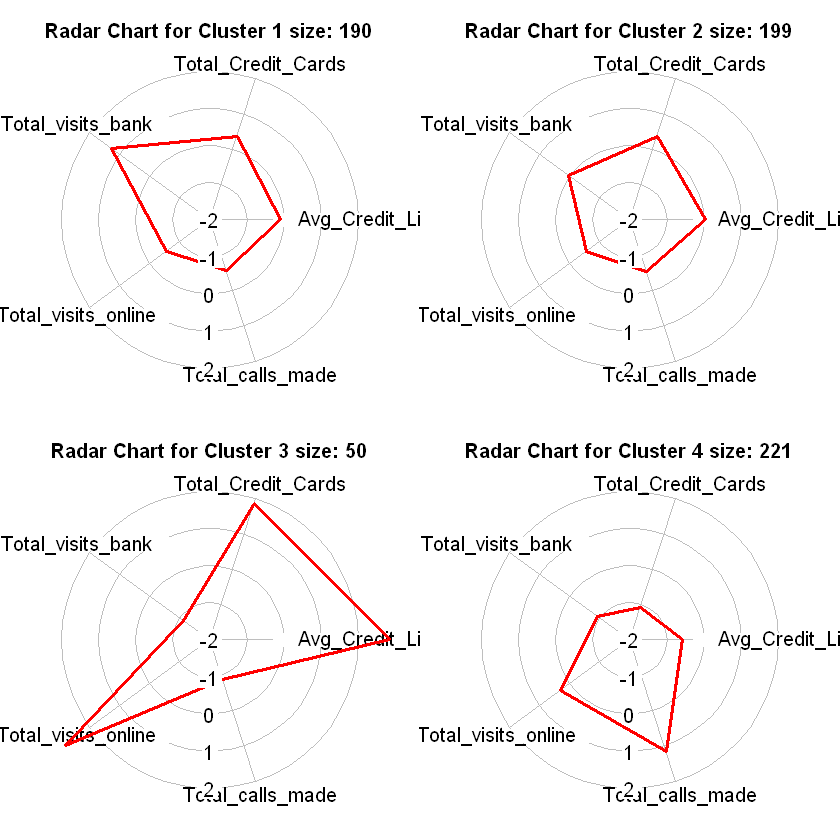

In [9]:
kmc <- kmeans(df_s,4)
kmc_cluster <- kmc$cluster
kmc_size <- kmc$size
cluster_kmc <- data.frame(df_s, clusterID = as.factor(kmc$cluster))
kmc_summary <- data.frame()
print(kmc_size)

for (i in 1:(ncol(cluster_kmc)-1)){
  kmc_summary = rbind(kmc_summary, 
                      tapply(cluster_kmc[,i], cluster_kmc$clusterID, mean))
}

colnames(kmc_summary) <- paste("cluster", c(1:4))
rownames(kmc_summary) <- colnames(df_s)
kmc_summary

# Radar chart
par(mfrow = c(2,2))
for (i in 1:4){
  plot_title <- paste("Radar Chart for Cluster", i,"size:", kmc_size[i] ,sep=" ")
  radial.plot(kmc_summary[,i], labels = rownames(kmc_summary), 
              radial.lim=c(-2,2), rp.type = "p", main = plot_title, 
              line.col = "red", lwd = 3, show.grid.labels=1)
}

# A5

## 군집 A & B

In [30]:
# Compare the first and the second cluster
kmc_cluster1 <- df[kmc$cluster == 1,]
kmc_cluster2 <- df[kmc$cluster == 2,]

# t_test_result
kmc_t_result <- data.frame()

for (i in 1:5){
  
  kmc_t_result[i,1] <- t.test(kmc_cluster1[,i], kmc_cluster2[,i], 
                              alternative = "two.sided")$p.value
  
  kmc_t_result[i,2] <- t.test(kmc_cluster1[,i], kmc_cluster2[,i], 
                              alternative = "greater")$p.value
  
  kmc_t_result[i,3] <- t.test(kmc_cluster1[,i], kmc_cluster2[,i], 
                              alternative = "less")$p.value
}
colnames(kmc_t_result)<-c("two.sided","greater","less")
rownames(kmc_t_result)<-c("Avg_Credit_Limit","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made")
kmc_t_result

,two.sided,greater,less
,<dbl>,<dbl>,<dbl>
Avg_Credit_Limit,8.169564e-31,1.000000e+00,4.084782e-31
Total_Credit_Cards,1.481096e-42,1.000000e+00,7.405482e-43
Total_visits_bank,3.199625e-04,1.599813e-04,9.998400e-01
Total_visits_online,7.970254e-24,1.000000e+00,3.985127e-24
Total_calls_made,5.006572e-75,2.503286e-75,1.000000e+00


|변수|유의 수준 0.05| 해석 | 
|--------|------------------|-------|
|Avg_Credit_Limit|  O | A < B |
|Total_Credit_Cards| O | A < B |
|Total_visits_bank|	O |A > B |
|Total_visits_online| O |A < B |	
|Total_calls_made|	O | A > B |

즉 모든 변수가 두 군집간에 서 차이가 있거나 더 크거나 작다고 할 수 있습니다.

## 군집 X&Y

In [31]:
kmc_cluster1 <- df[kmc$cluster == 3,]
kmc_cluster2 <- df[kmc$cluster == 4,]

# t_test_result
kmc_t_result <- data.frame()

for (i in 1:5){
  
  kmc_t_result[i,1] <- t.test(kmc_cluster1[,i], kmc_cluster2[,i], 
                              alternative = "two.sided")$p.value
  
  kmc_t_result[i,2] <- t.test(kmc_cluster1[,i], kmc_cluster2[,i], 
                              alternative = "greater")$p.value
  
  kmc_t_result[i,3] <- t.test(kmc_cluster1[,i], kmc_cluster2[,i], 
                              alternative = "less")$p.value
}
colnames(kmc_t_result)<-c("two.sided","greater","less")
rownames(kmc_t_result)<-c("Avg_Credit_Limit","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made")
kmc_t_result

,two.sided,greater,less
,<dbl>,<dbl>,<dbl>
Avg_Credit_Limit,3.711490e-02,9.814426e-01,0.01855745
Total_Credit_Cards,7.080456e-01,6.459772e-01,0.35402279
Total_visits_bank,3.066284e-132,1.533142e-132,1.00000000
Total_visits_online,6.424575e-01,3.212287e-01,0.67877126
Total_calls_made,3.408880e-01,8.295560e-01,0.17044399


|변수|유의 수준 0.05| 해석 | 
|--------|------------------|-------|
|Avg_Credit_Limit|  O | A != B |
|Total_Credit_Cards| X |  |
|Total_visits_bank|	O |A > B |
|Total_visits_online| X | |	
|Total_calls_made|	X | B |


즉 통계적으로 차이가 유의미 하지 않은 변수가 3개 있습니다. 이는 비중으로 따지만 0.6 입니다.

# Hierachical  Clustering

# A6 ~ A7

위 그래프를 비교해 보면, complete 방법이 각 군집을 개별적으로 표현하는데 효과적이고, single방법은 군집간 계층도를 잘 표현하지 못하는 것을 알수있습니다.

이를 통해서 위 데이터에서는 complete 방법이 single 방법 보다 더 성능이 좋은 것을 알 수 있습니다.
k=
더 군집에 대한 경계가 확실하고, single linkage자체가 위 데이터의 군집을 잘 설명 할 수 없는 덴드로그램을 그리기 떄문입니다.

-------------------   complete  ------------------- 

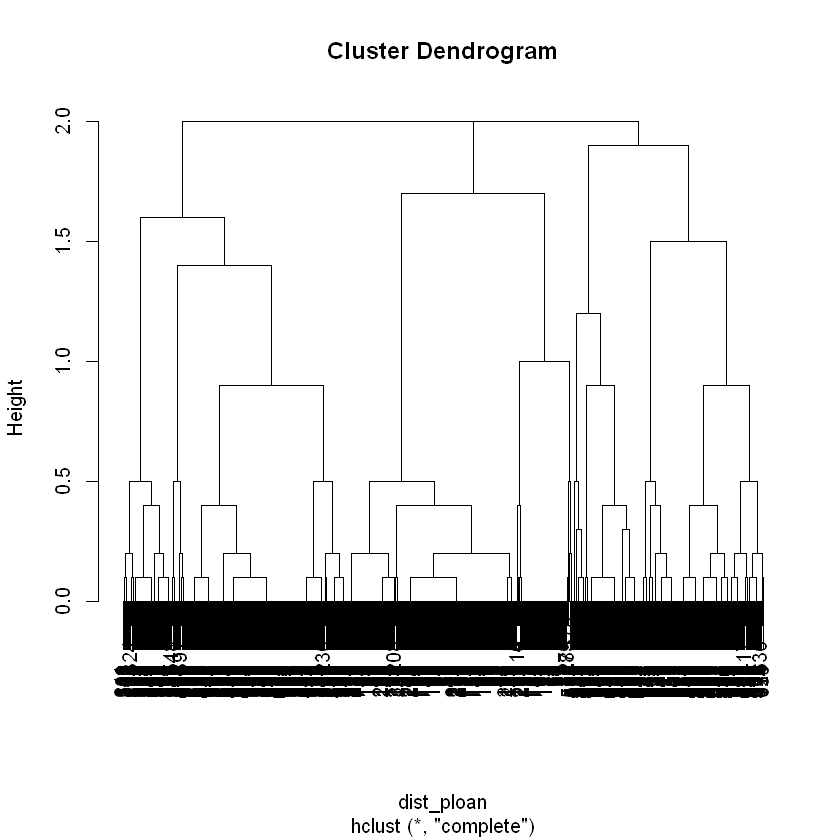

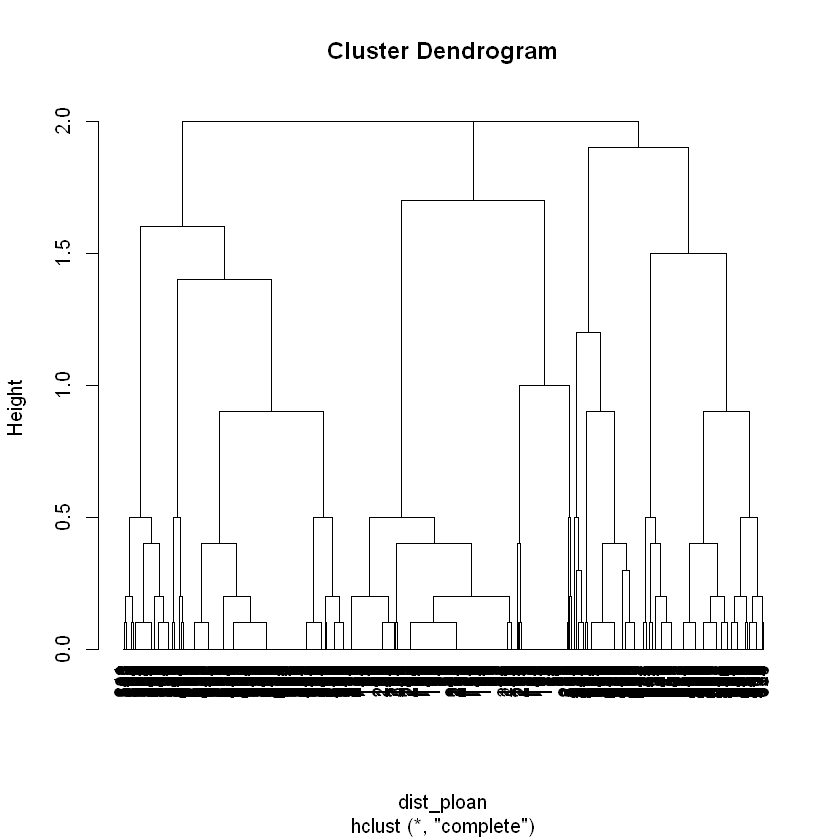

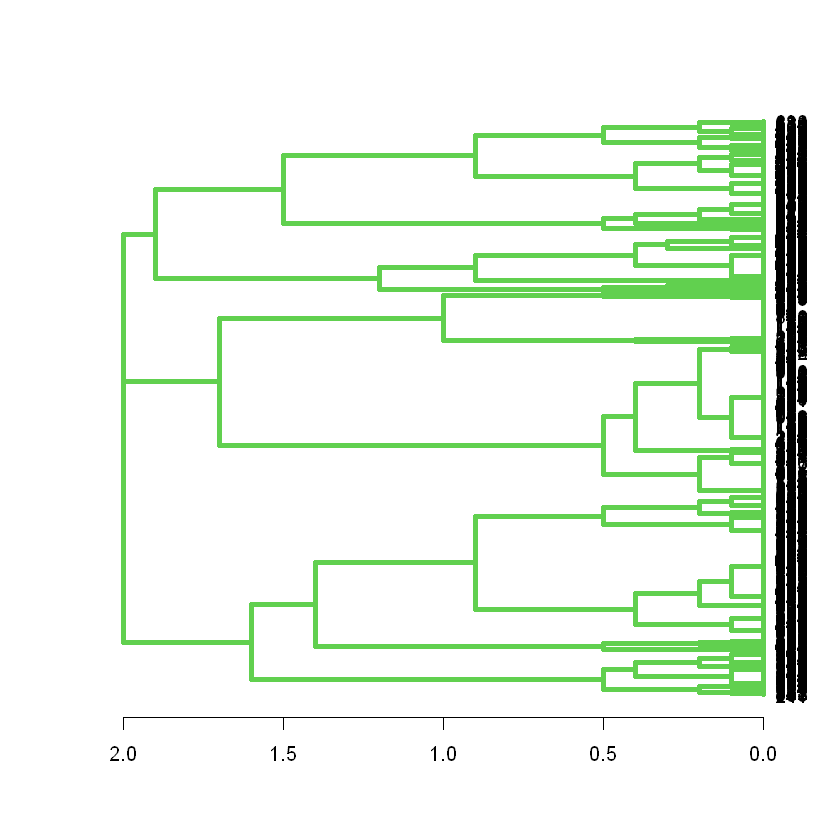

-------------------   single  ------------------- 

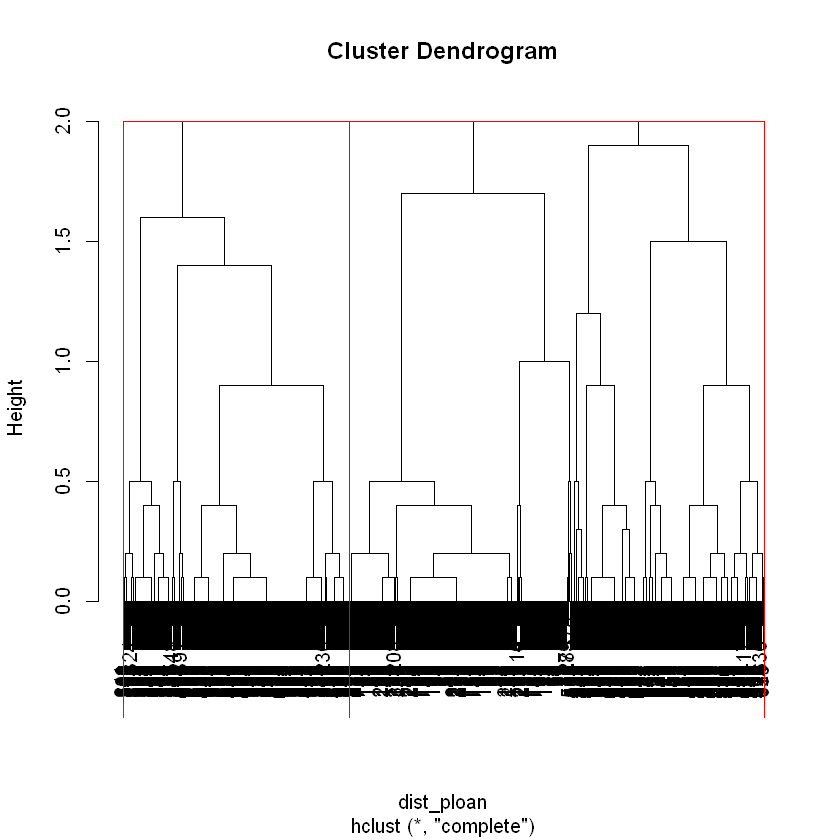

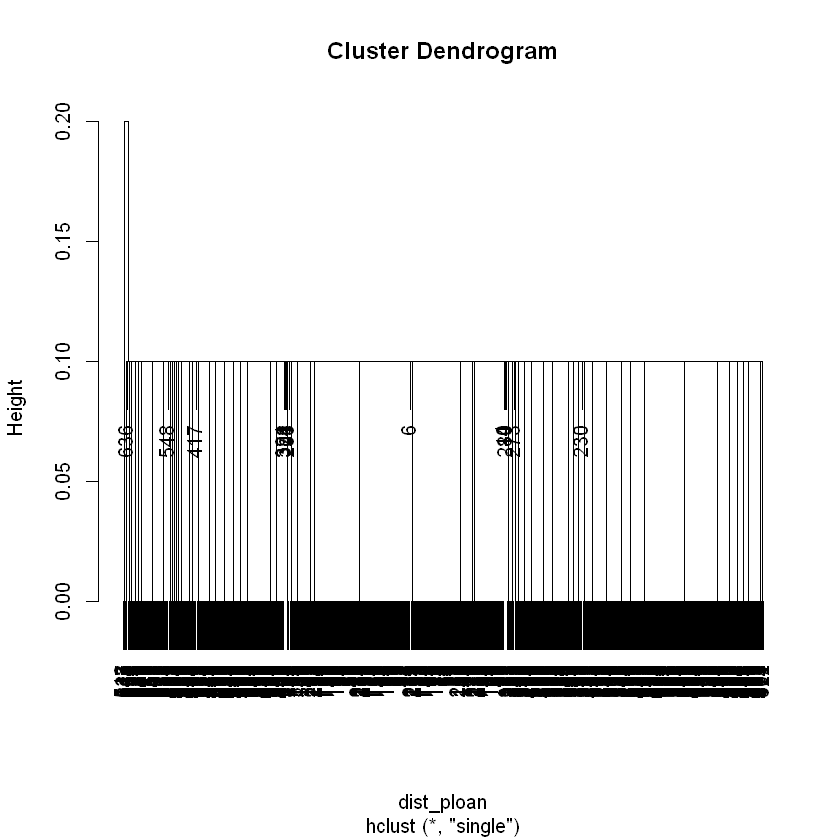

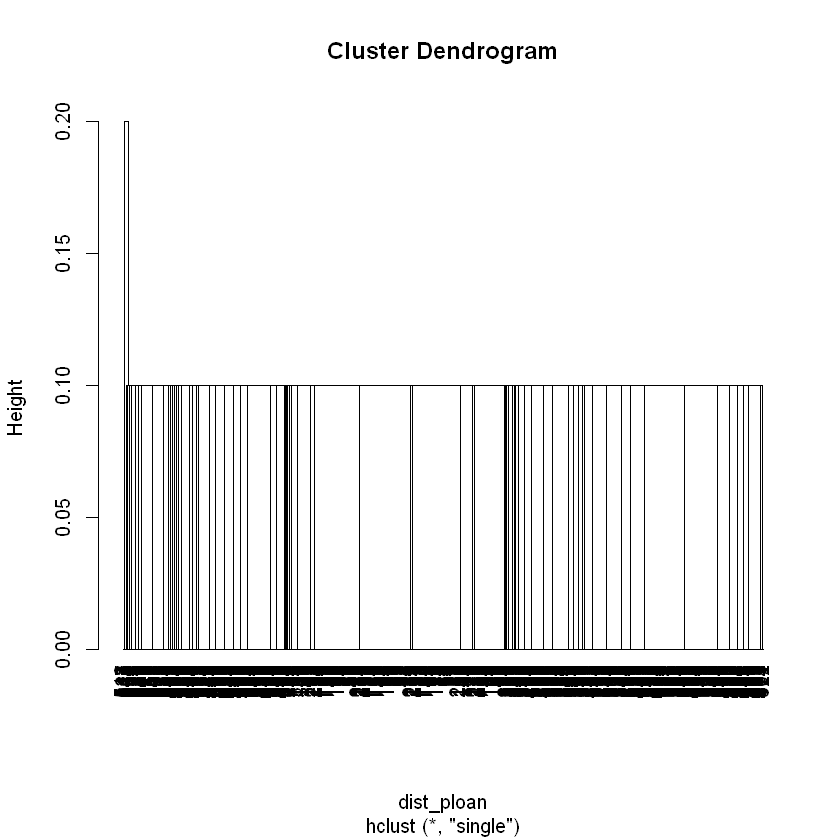

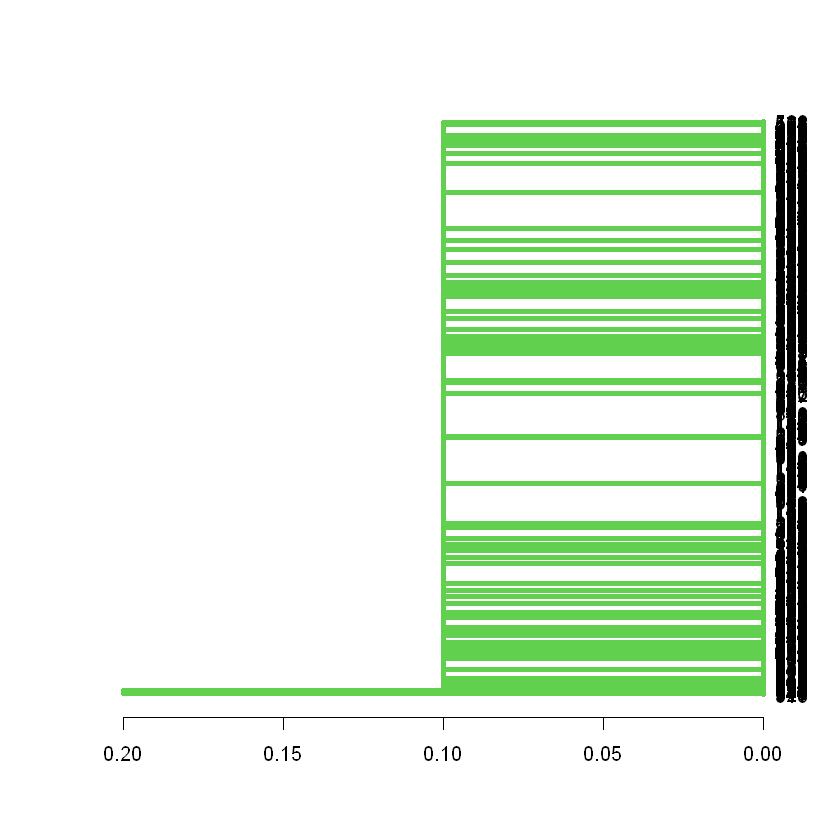

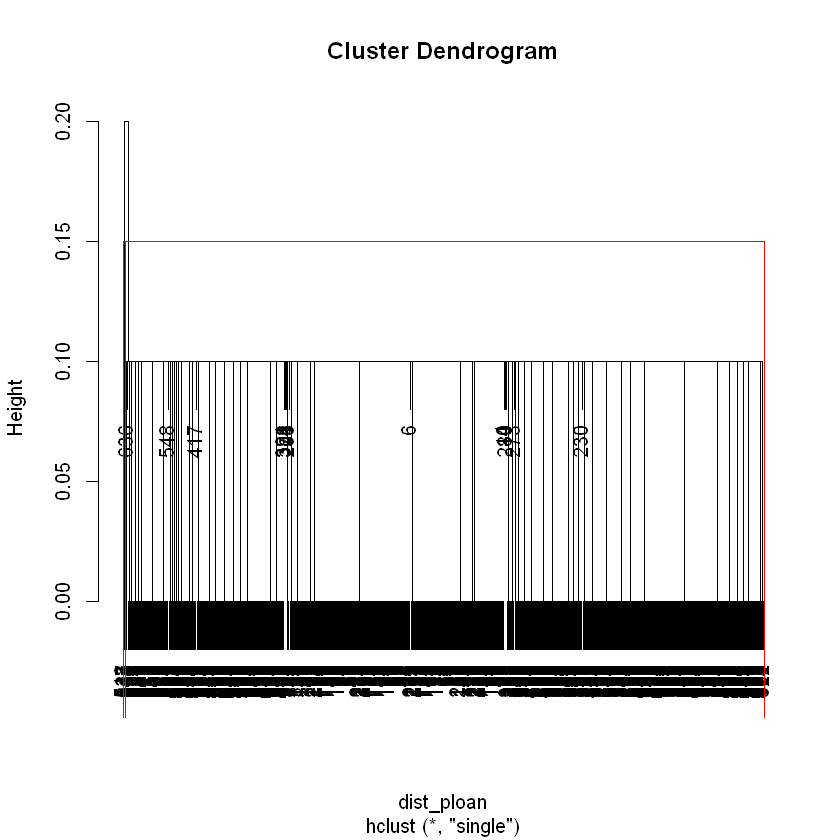

In [10]:
#complete
cat("-------------------   complete  ------------------- ")
cor_Mat <- cor(t(df_s), method = "spearman")
dist_ploan <- as.dist(1-cor_Mat)
# Perform hierarchical clustering
hr <- hclust(dist_ploan, method = "complete", members=NULL)
# plot the results
plot(hr)
plot(hr, hang = -1)
plot(as.dendrogram(hr), edgePar=list(col=3, lwd=4), horiz=T)
# Find the clusters
mycl <- cutree(hr, k=2)
plot(hr)
rect.hclust(hr, k=2, border="red")


#single
cat("-------------------   single  ------------------- ")
cor_Mat <- cor(t(df_s), method = "spearman")
dist_ploan <- as.dist(1-cor_Mat)
# Perform hierarchical clustering
hr <- hclust(dist_ploan, method = "single", members=NULL)
# plot the results
plot(hr)
plot(hr, hang = -1)
plot(as.dendrogram(hr), edgePar=list(col=3, lwd=4), horiz=T)
# Find the clusters
mycl <- cutree(hr, k=2)

plot(hr)
rect.hclust(hr, k=2, border="red")


## complete : 
#### Q2에서 찾은 최적 군집수는 2 이지만, 4를 가지고 문제 풀이 했기 때문에 그냥 아래 문제에서는 k=4로 두고 풀겠습니다.


  1   2   3   4 
 71 230 126 233 

,cluster 1,cluster 2,cluster 3,cluster 4
,<dbl>,<dbl>,<dbl>,<dbl>
Avg_Credit_Limit,0.52677387,-0.5852966,1.4709814,-0.3782249
Total_Credit_Cards,-0.09830216,-1.0116163,1.0435266,0.4642354
Total_visits_bank,0.86644193,-0.8811138,-0.4318005,0.8392518
Total_visits_online,-0.57586053,0.3000609,0.7857134,-0.5456128
Total_calls_made,-0.56241681,1.1256564,-0.6910785,-0.5660665


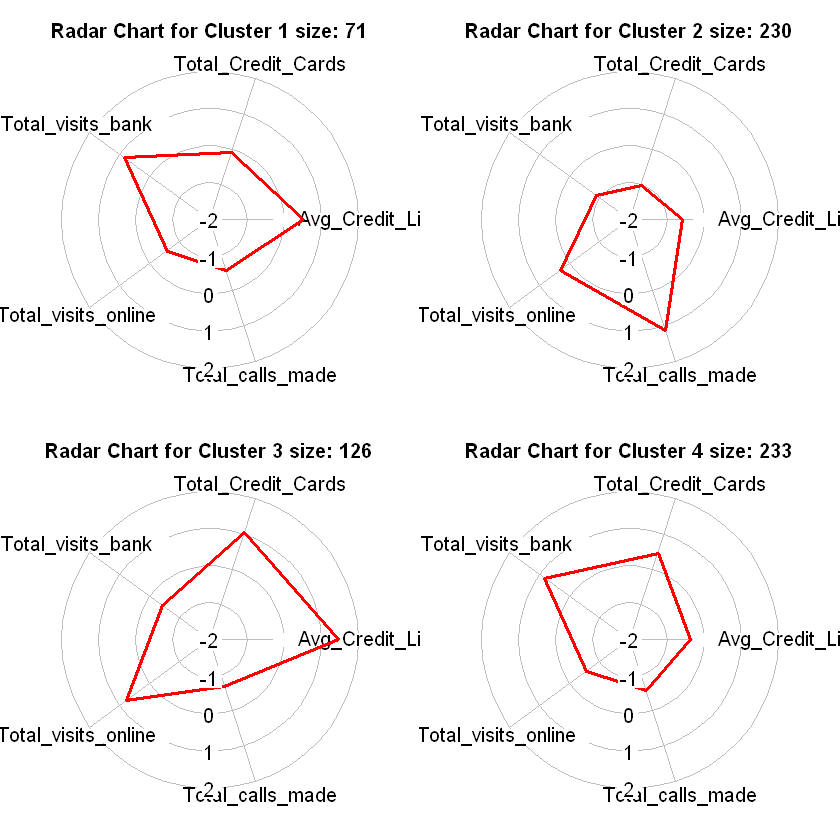

In [11]:
cor_Mat <- cor(t(df_s), method = "spearman")
dist_ploan <- as.dist(1-cor_Mat)
# Perform hierarchical clustering
hr <- hclust(dist_ploan, method = "complete", members=NULL)
# Find the clusters
mycl <- cutree(hr, k=4)


df_hc <- data.frame(df_s, clusterID = as.factor(mycl))
size<-table(df_hc$clusterID)
size
hc_summary <- data.frame()

for (i in 1:(ncol(df_hc)-1)){
  hc_summary = rbind(hc_summary, 
                     tapply(df_hc[,i], df_hc$clusterID, mean))
}
colnames(hc_summary) <- paste("cluster", c(1:4))
rownames(hc_summary) <- c(colnames(df_s))
hc_summary


# Radar chart
par(mfrow = c(2,2))
for (i in 1:4){
  plot_title <- paste("Radar Chart for Cluster", i,"size:",size[i], sep=" ")
  radial.plot(hc_summary[,i], labels = rownames(hc_summary), 
              radial.lim=c(-2,2), rp.type = "p", main = plot_title, 
              line.col = "red", lwd = 3, show.grid.labels=1)
}

new_complete<-df_hc %>% 
  mutate(size_cluster = case_when(clusterID == 1  ~ 1, 
                                  clusterID == 2  ~ 3,
                                  clusterID == 3  ~ 2,
                                  clusterID == 4  ~ 4))

single과 complete로 만들어진 군집의 크기를 비교하면 (655, 2, 1, 2 ) vs (71, 230, 126, 233)입니다. 우선 이렇게 나뉜 사이즈로 둘의 성능을 평가하기는 어렵지만, 그럼에도 불구하고 radar 표를 보면 single은 거의 위아래로 대칭이라고 할 수 있을 정도로, 군집간 차이가 존재하지 않습니다. 그래서 당연하 complete linkage가 더 kmeans clustering 결과와 비슷하합니다.

complete linkage와 kmeans clusteing을 비교하면,
우선 비슷한 모양인 아래 두 군집군이 있고, 차이점이 있는 것은 상대적으로 군집수가 적은 kmeans에서 군집수 50 & 199 와 hierachcal에서 군집수 71 & 126 이다.

|비슷| kmean | hierachical-complete|
|----|-------|---------------------|
| |221 | 230|
| | 190 | 233|

## single


  1   2   3   4 
655   2   1   2 

,cluster 1,cluster 2,cluster 3,cluster 4
,<dbl>,<dbl>,<dbl>,<dbl>
Avg_Credit_Limit,-0.009216133,0.2903818,2.1109562,1.6724237
Total_Credit_Cards,-0.009486157,-0.3256985,2.4420400,2.2113951
Total_visits_bank,0.005627752,-0.2469832,-0.8597985,-1.1662062
Total_visits_online,-0.007784961,-0.2064433,1.4967140,2.0076612
Total_calls_made,0.003152558,-0.2035842,-0.5525858,-0.5525858


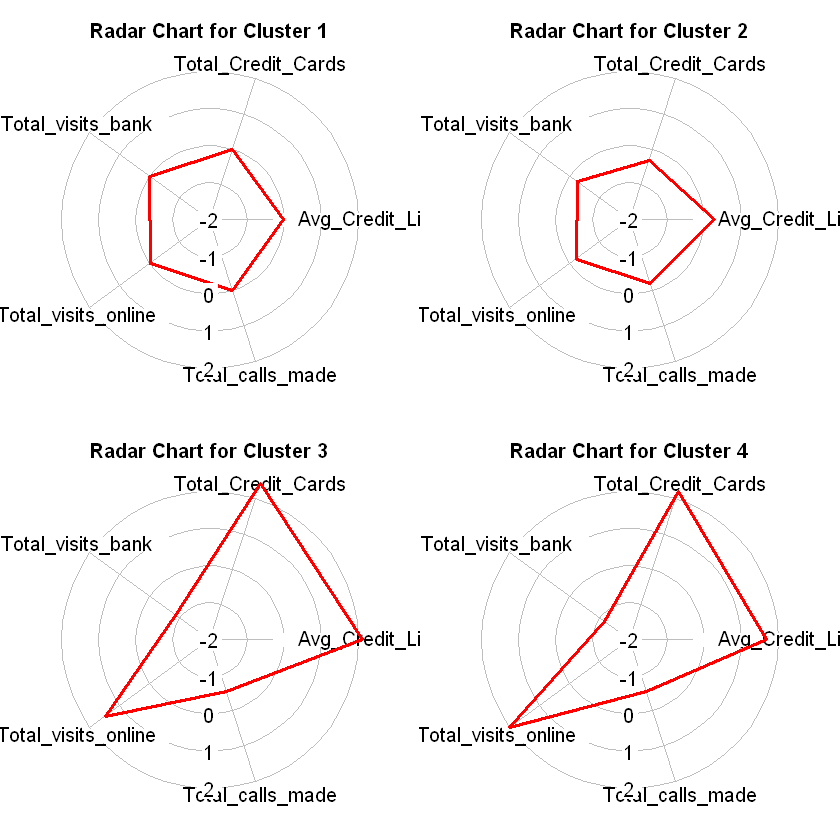

In [12]:
cor_Mat <- cor(t(df_s), method = "spearman")
dist_ploan <- as.dist(1-cor_Mat)
# Perform hierarchical clustering
hr <- hclust(dist_ploan, method = "single", members=NULL)
# Find the clusters
mycl <- cutree(hr, k=4)


df_hc <- data.frame(df_s, clusterID = as.factor(mycl))
table(df_hc$clusterID)
hc_summary <- data.frame()

for (i in 1:(ncol(df_hc)-1)){
  hc_summary = rbind(hc_summary, 
                     tapply(df_hc[,i], df_hc$clusterID, mean))
}
colnames(hc_summary) <- paste("cluster", c(1:4))
rownames(hc_summary) <- c(colnames(df_s))
hc_summary

# Radar chart
par(mfrow = c(2,2))
for (i in 1:4){
  plot_title <- paste("Radar Chart for Cluster", i, sep=" ")
  radial.plot(hc_summary[,i], labels = rownames(hc_summary), 
              radial.lim=c(-2,2), rp.type = "p", main = plot_title, 
              line.col = "red", lwd = 3, show.grid.labels=1)
}

new_single<-df_hc %>% 
  mutate(size_cluster = case_when(clusterID == 1  ~ 4, 
                                  clusterID == 2  ~ 3,
                                  clusterID == 3  ~ 1,
                                  clusterID == 4  ~ 2))

# A8 : k means & (complete , single method)의 정량적 비교 방법

single linkage와 complete linkage를 k-means에다가 비교할거면, 우선 각 클러스터링의 결과(clusterID)를 size의 오름차순으로 지정하고, 이를 대상으로 confusion matrix를 만든다.

그리고 해당 confusion matrix의 accuracy를 비교한다.


In [13]:
new_kmc<-cluster_kmc %>% 
  mutate(size_cluster = case_when(clusterID == 1  ~ 2, 
                                  clusterID == 2  ~ 3,
                                  clusterID == 3  ~ 1,
                                  clusterID == 4  ~ 4))
# kmc size : 190 199  50 221 [2,3,1,4] 로 새로운 칼럼 생성한다
head(new_kmc)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,clusterID,size_cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,1.7388680,-1.2482780,-0.8597985,-0.5470748,-1.2505889,2,3
2,0.4099816,-0.7869883,-1.4726139,2.5186084,1.8904250,4,4
3,0.4099816,1.0581707,-0.8597985,0.1341882,0.1454173,2,3
4,-0.1215730,0.1355912,-0.8597985,-0.5470748,0.1454173,2,3
5,1.7388680,0.5968810,-1.4726139,3.1998713,-0.2035842,3,1
6,-0.3873503,-0.7869883,-1.4726139,-0.5470748,1.5414235,4,4


In [14]:
table(new_kmc$size_cluster, new_complete$size_cluster)

   
      1   2   3   4
  1   0  50   0   0
  2  46   5   0 139
  3  25  71   9  94
  4   0   0 221   0

In [15]:
table(new_kmc$size_cluster, new_single$size_cluster)

   
      1   2   3   4
  1   1   2   0  47
  2   0   0   0 190
  3   0   0   2 197
  4   0   0   0 221

In [16]:
new_kmc<-cluster_kmc %>% 
  mutate(size_cluster = case_when(clusterID == 1  ~ 2, 
                                  clusterID == 2  ~ 4,
                                  clusterID == 3  ~ 1,
                                  clusterID == 4  ~ 3))
table(new_kmc$size_cluster, new_complete$size_cluster)

   
      1   2   3   4
  1   0  50   0   0
  2  46   5   0 139
  3   0   0 221   0
  4  25  71   9  94

single method는 잘 군집을 명명했지만, complete method는 4-3 군집이 잘 매치가 안됬기에 조정해주고 다시 confusion table을 만들면 아래와 같다.
그리고 이때 accuracy를 계산하면 (그냥 맞는 것만 숫자로 계산 ) 아래와 같다. 즉 complete가 더 k means clustering과 비슷하다.

| single | complete |
|--------|--------|
| 223 | 320 |


# DBSCAN

# A9


minpoint:  2   
eps:  0.8
minpoint:  2   
eps:  0.9

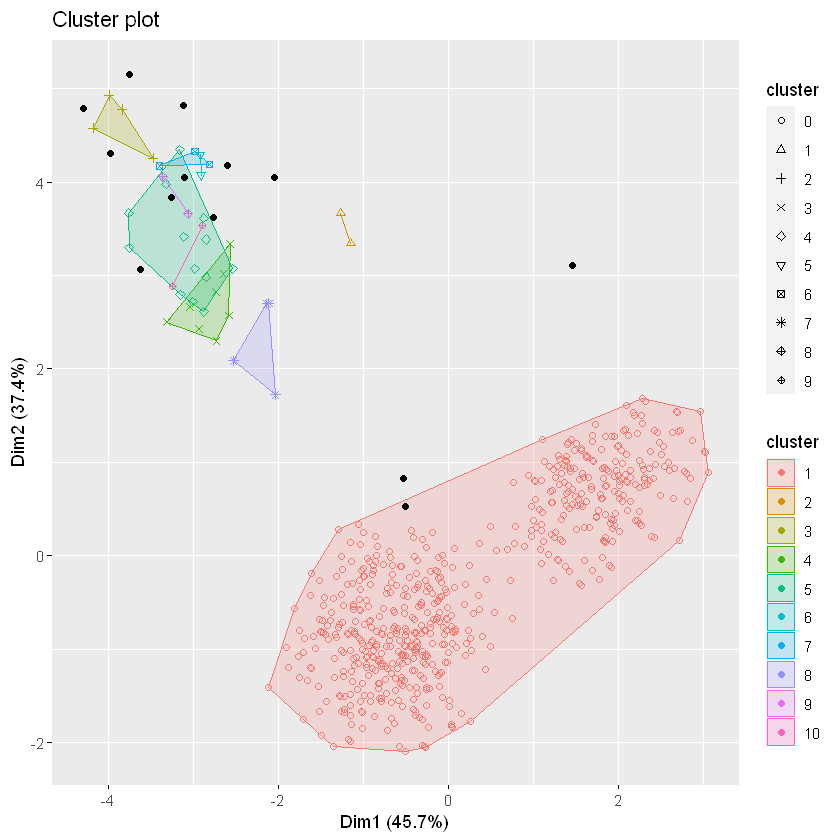


minpoint:  2   
eps:  1

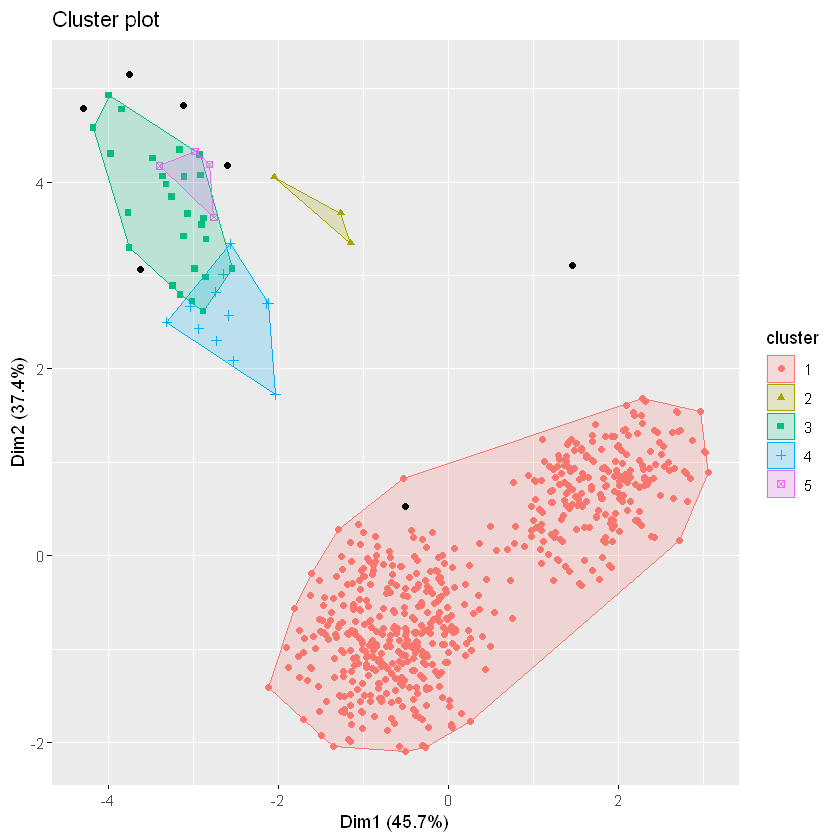


minpoint:  2   
eps:  1.1

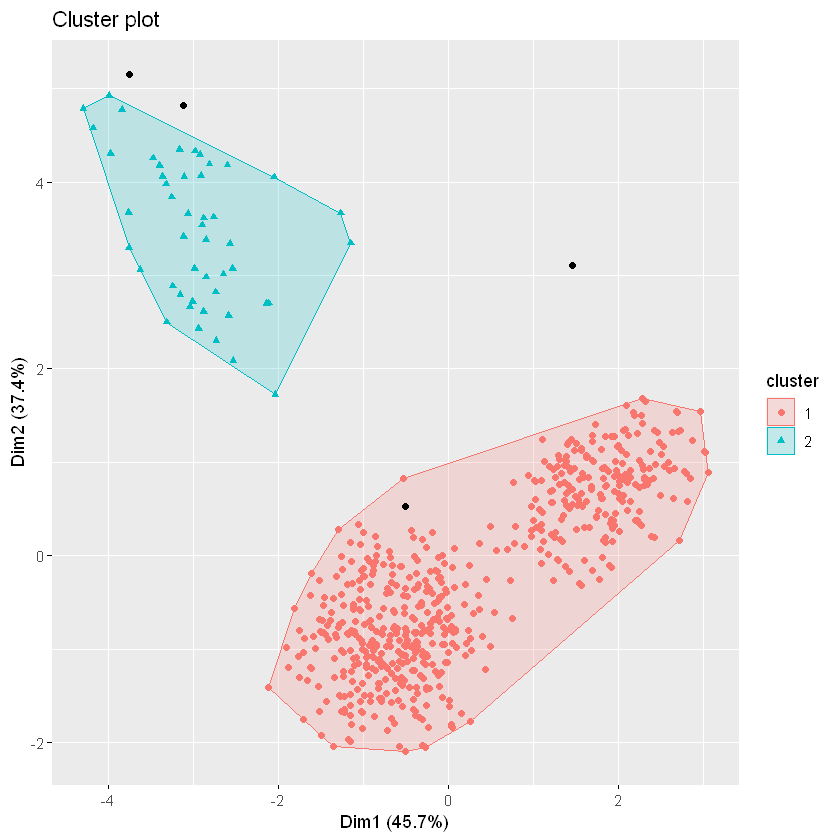


minpoint:  2   
eps:  1.2

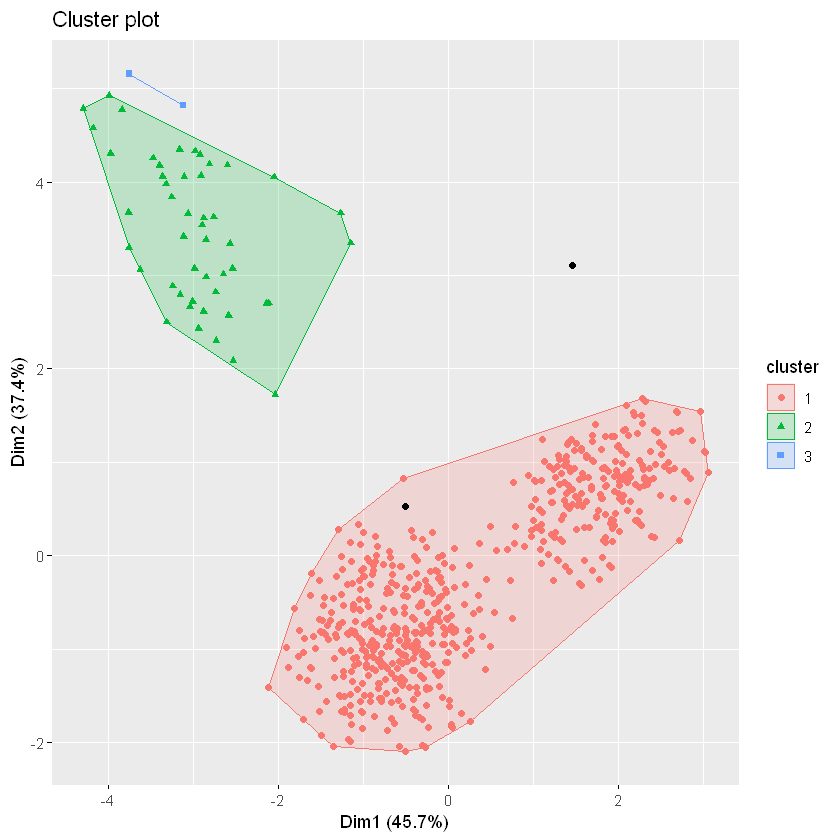


minpoint:  2   
eps:  1.3

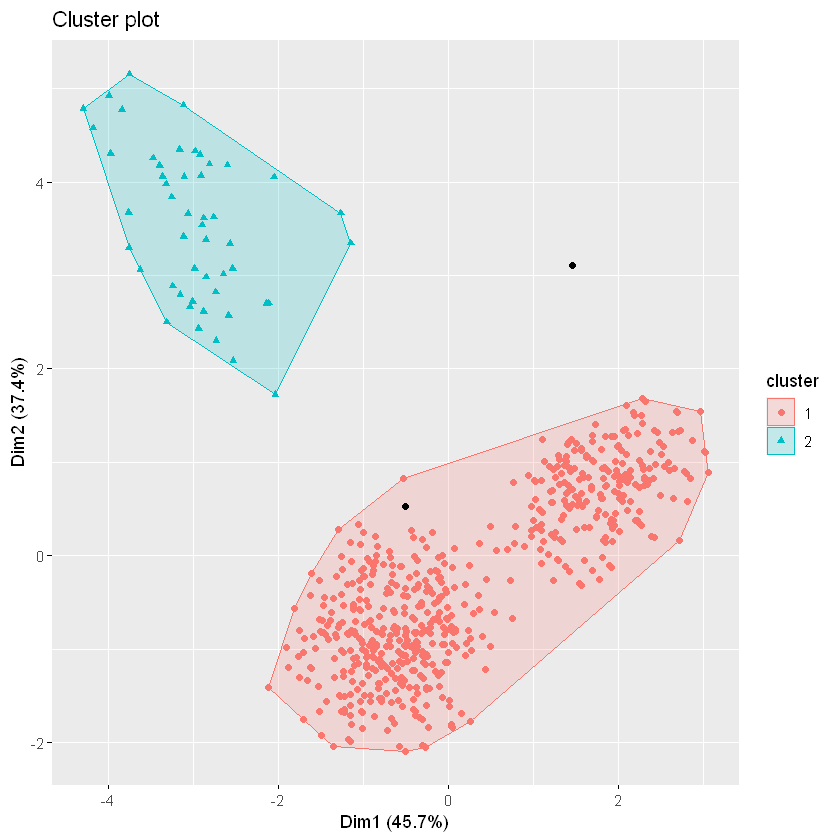


minpoint:  2   
eps:  1.4

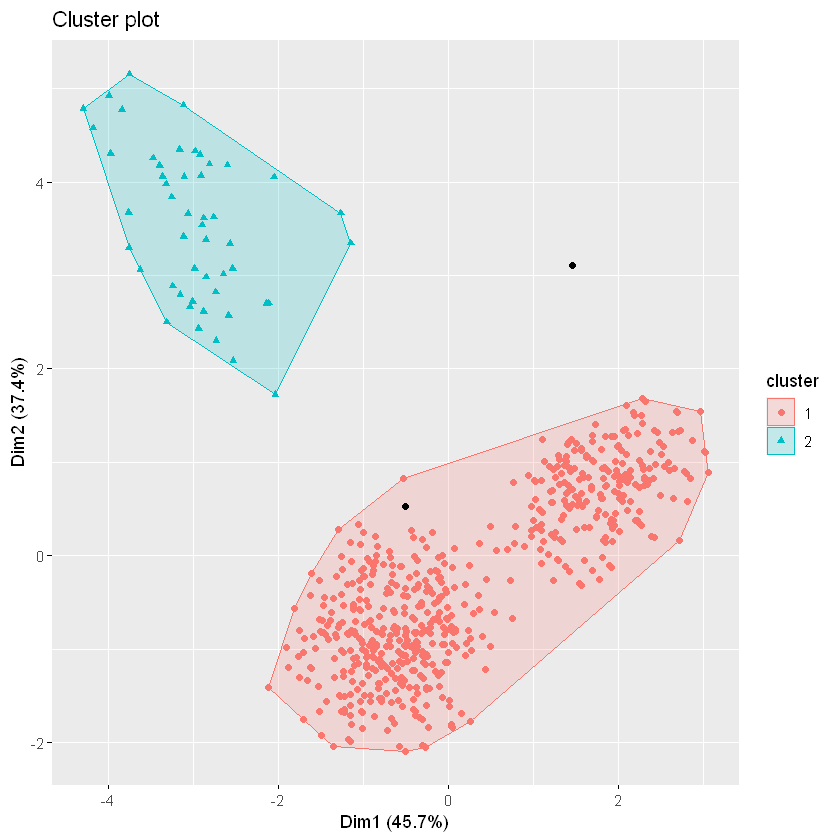


minpoint:  2   
eps:  1.5

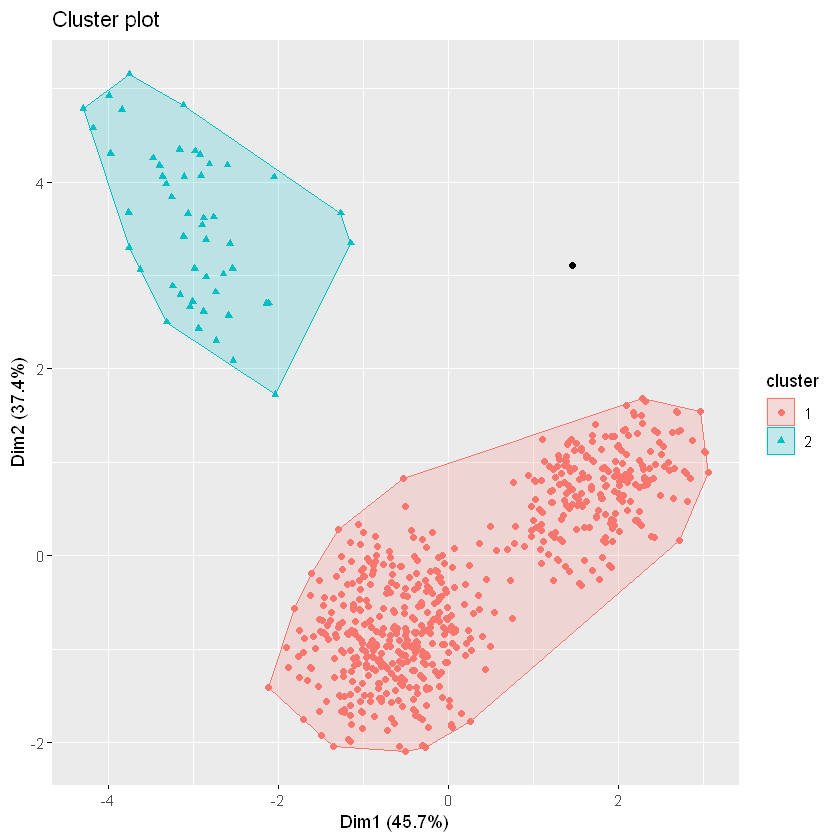


minpoint:  2   
eps:  1.6

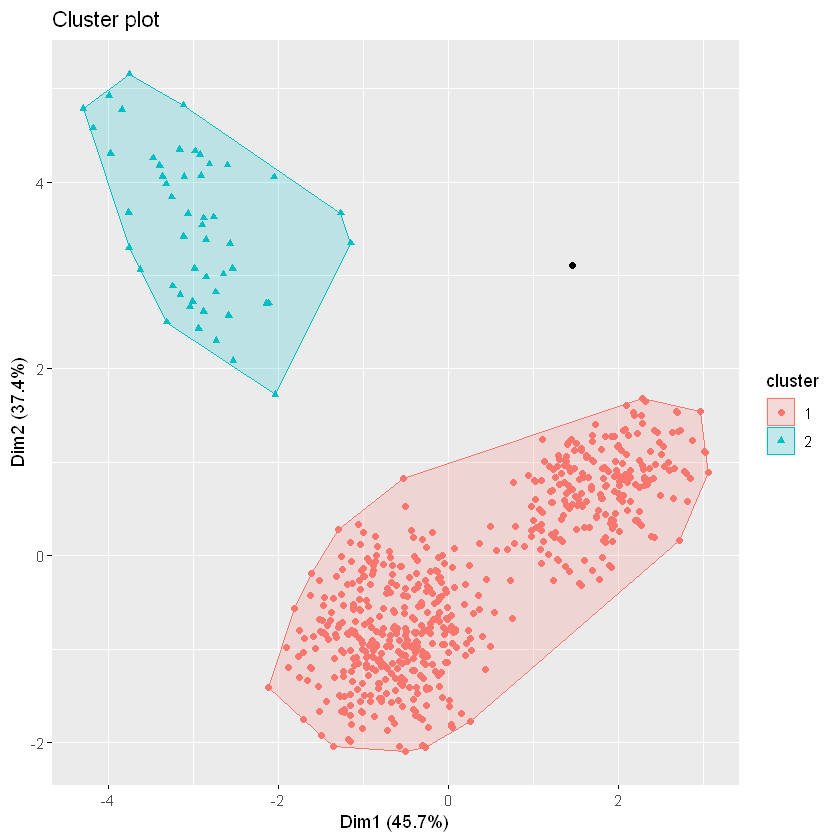


minpoint:  2   
eps:  1.7

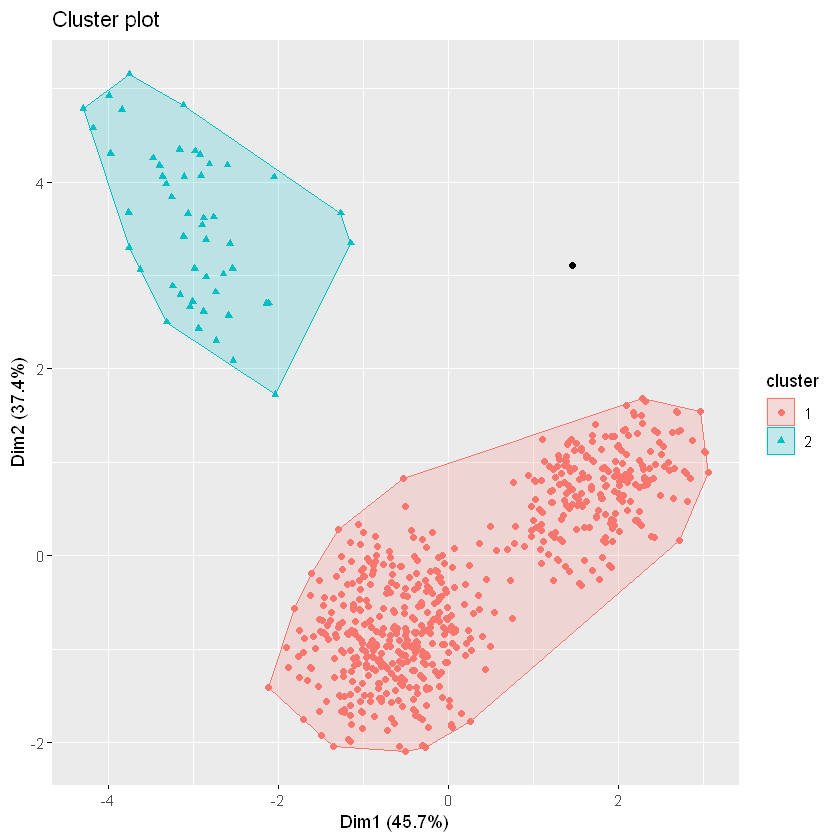


minpoint:  2   
eps:  1.8

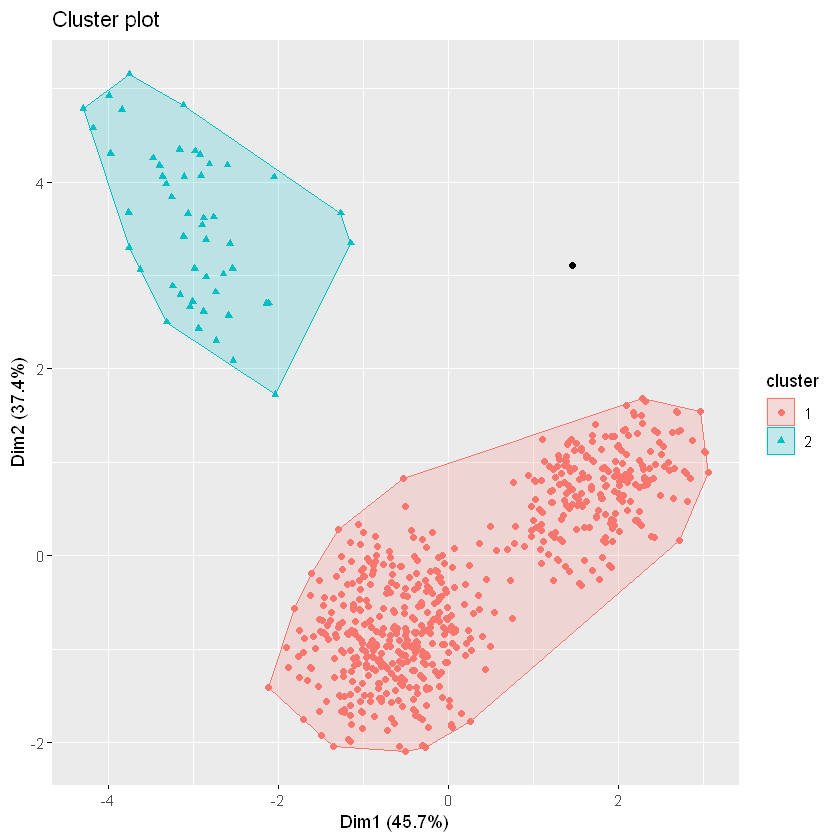


minpoint:  3   
eps:  0.8

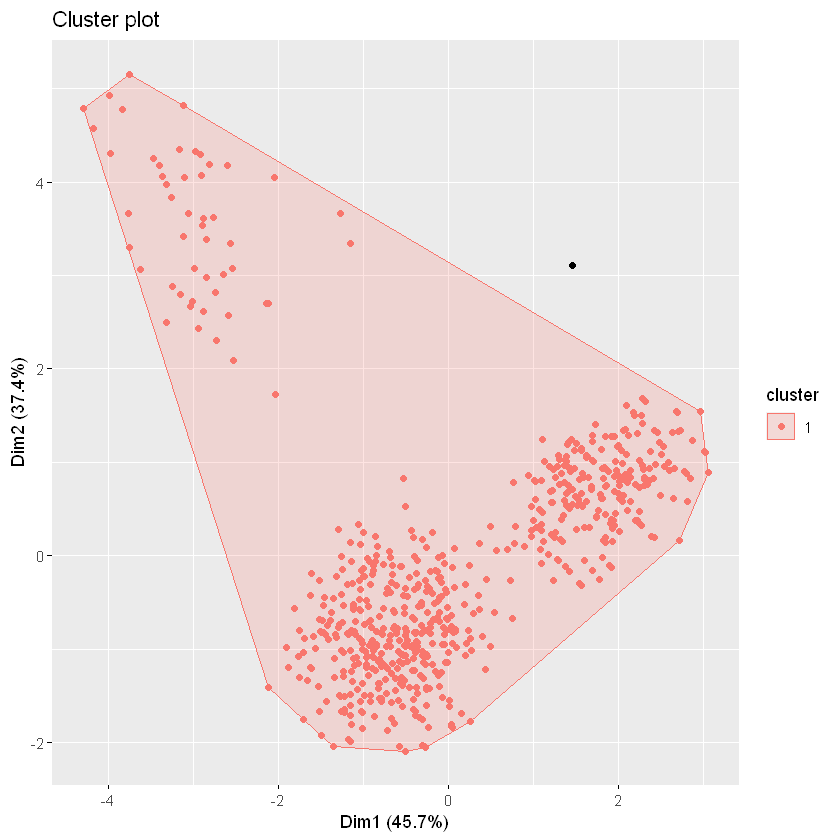


minpoint:  3   
eps:  0.9

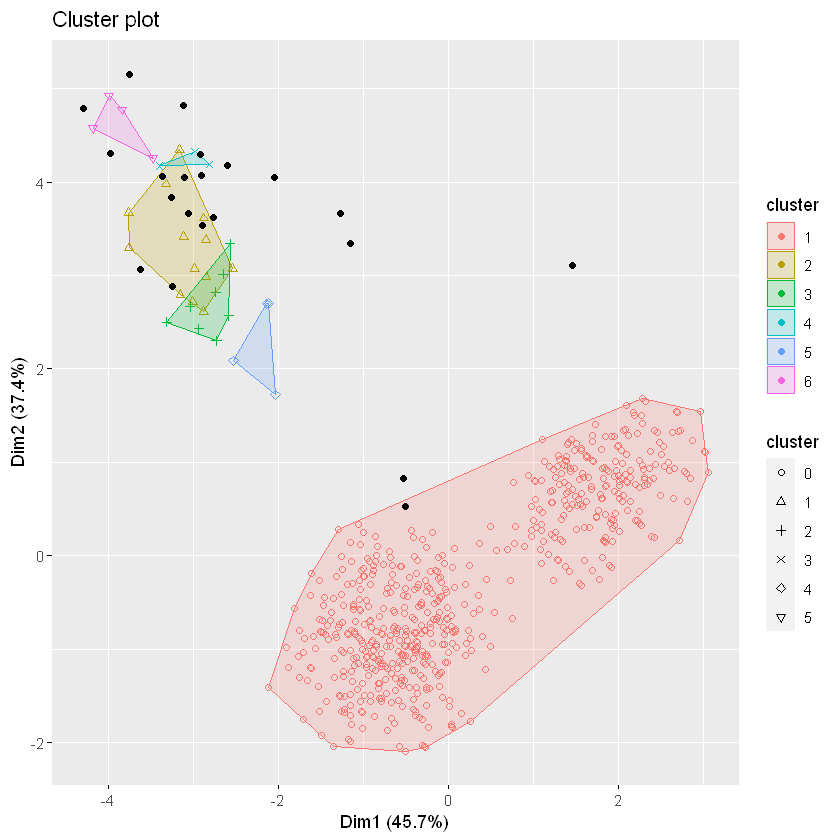


minpoint:  3   
eps:  1

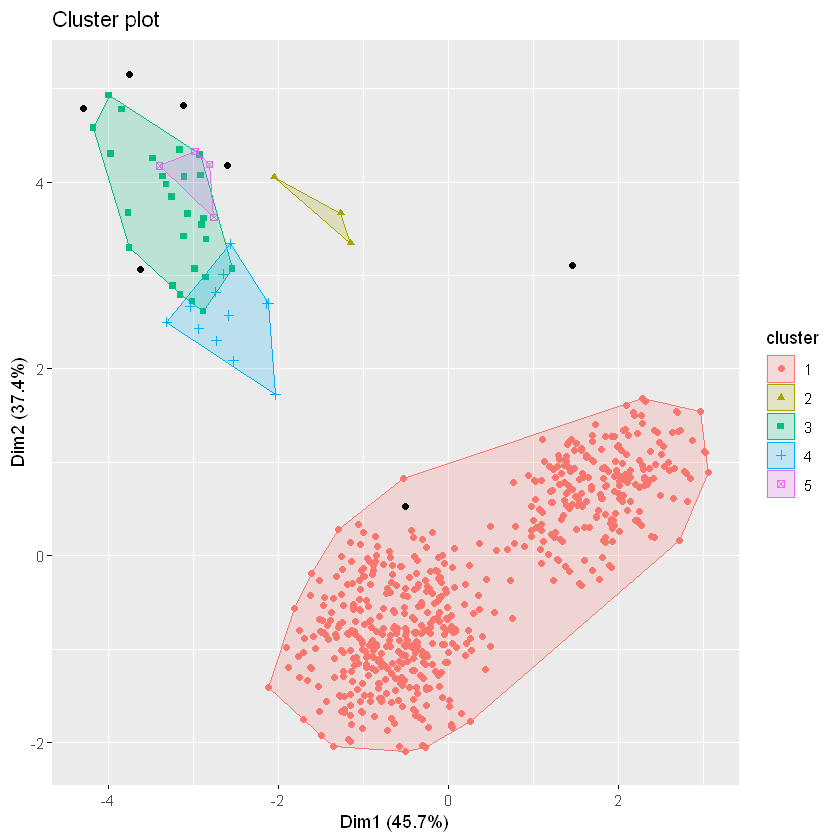


minpoint:  3   
eps:  1.1

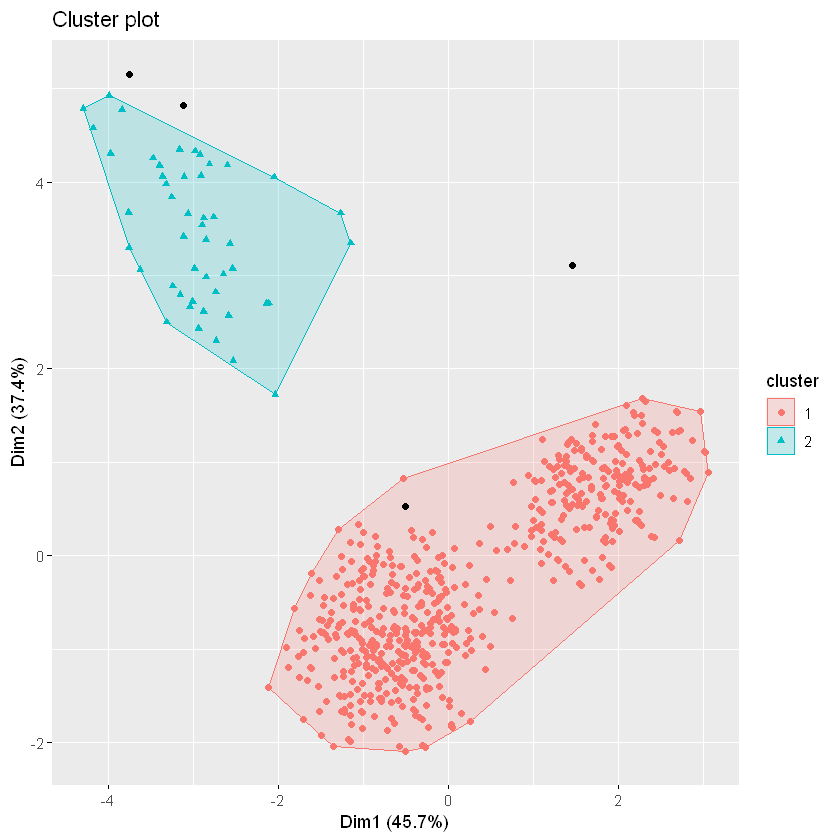


minpoint:  3   
eps:  1.2

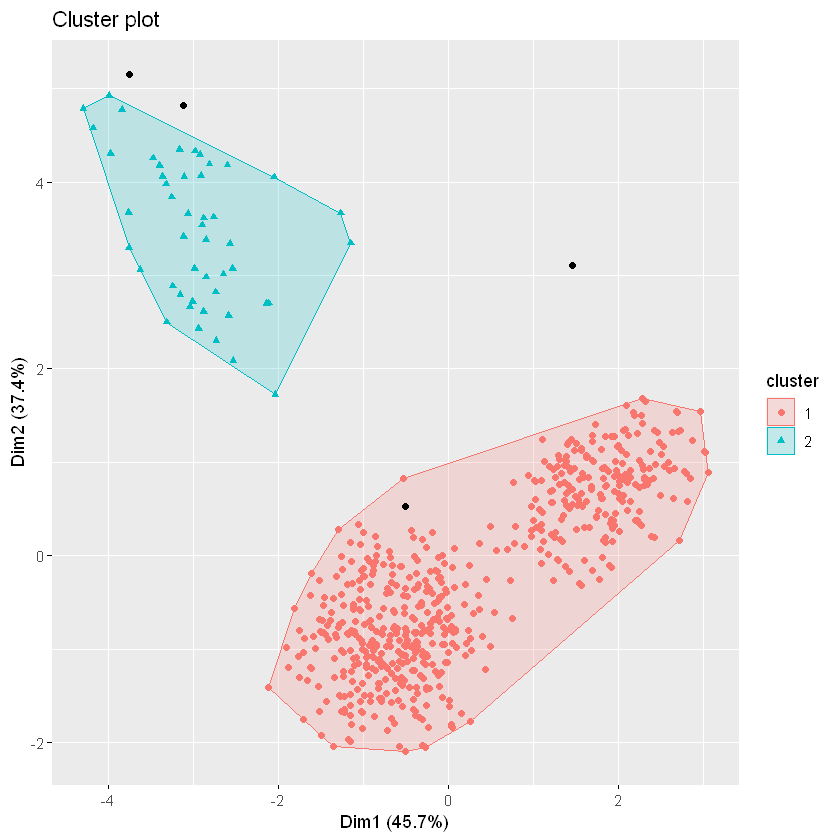


minpoint:  3   
eps:  1.3

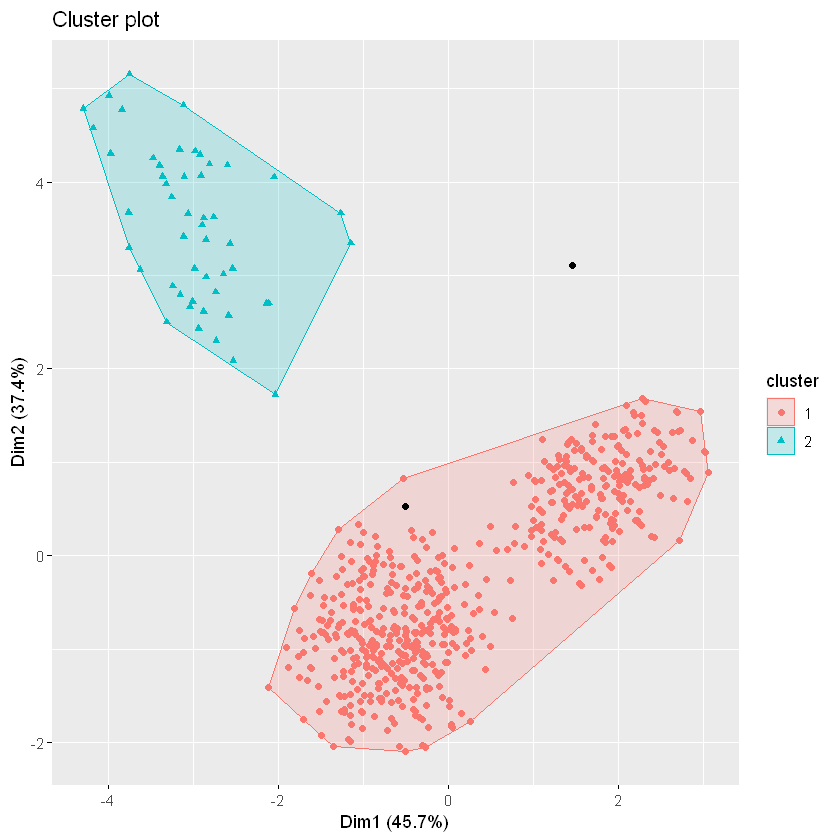


minpoint:  3   
eps:  1.4

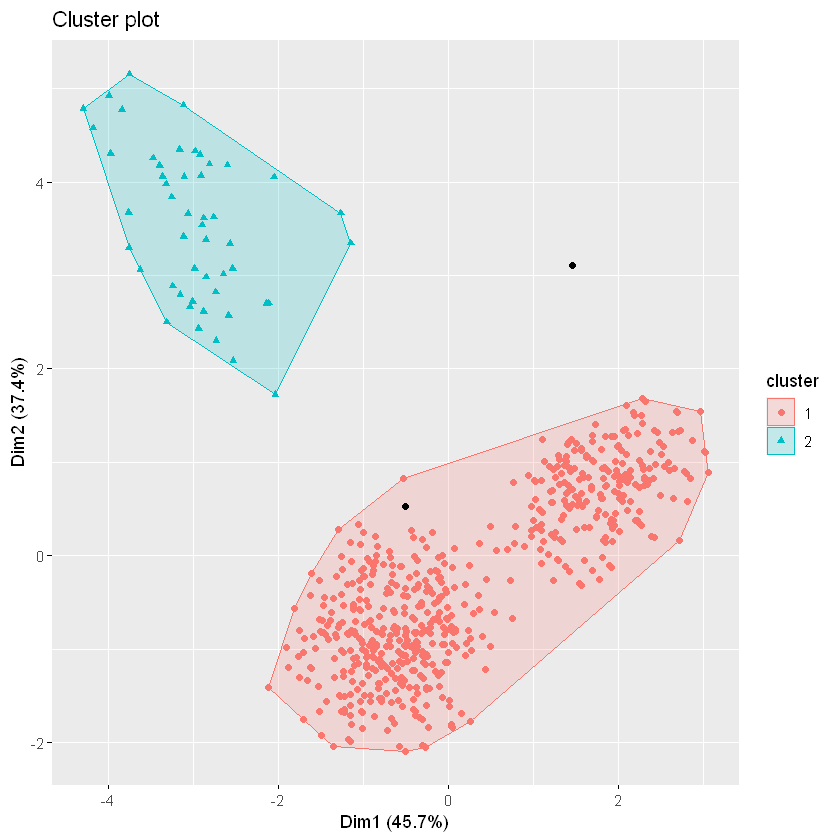


minpoint:  3   
eps:  1.5

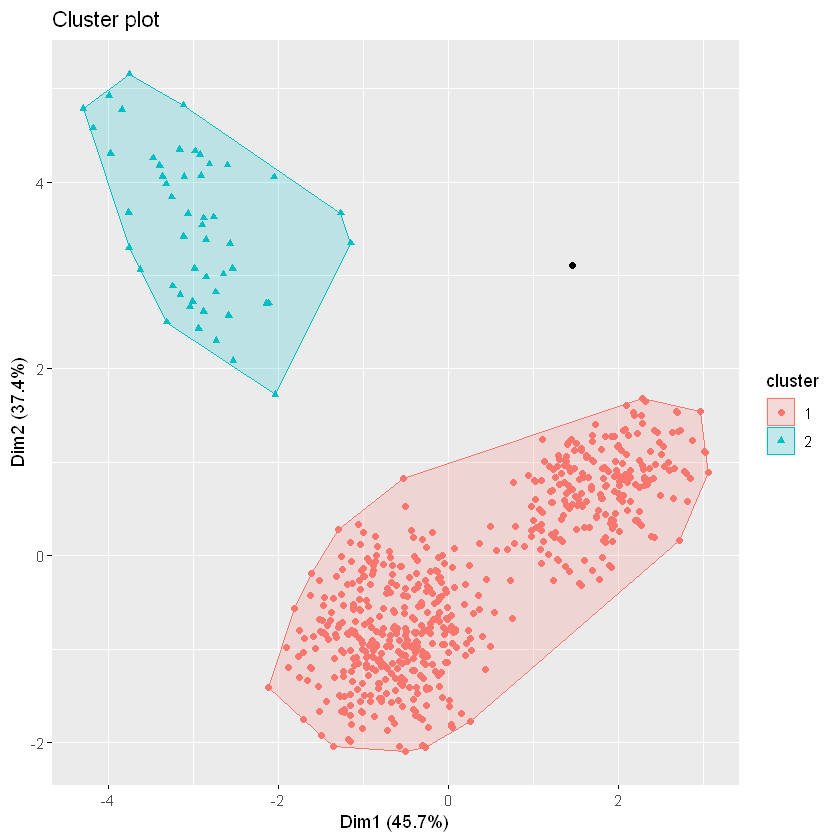


minpoint:  3   
eps:  1.6

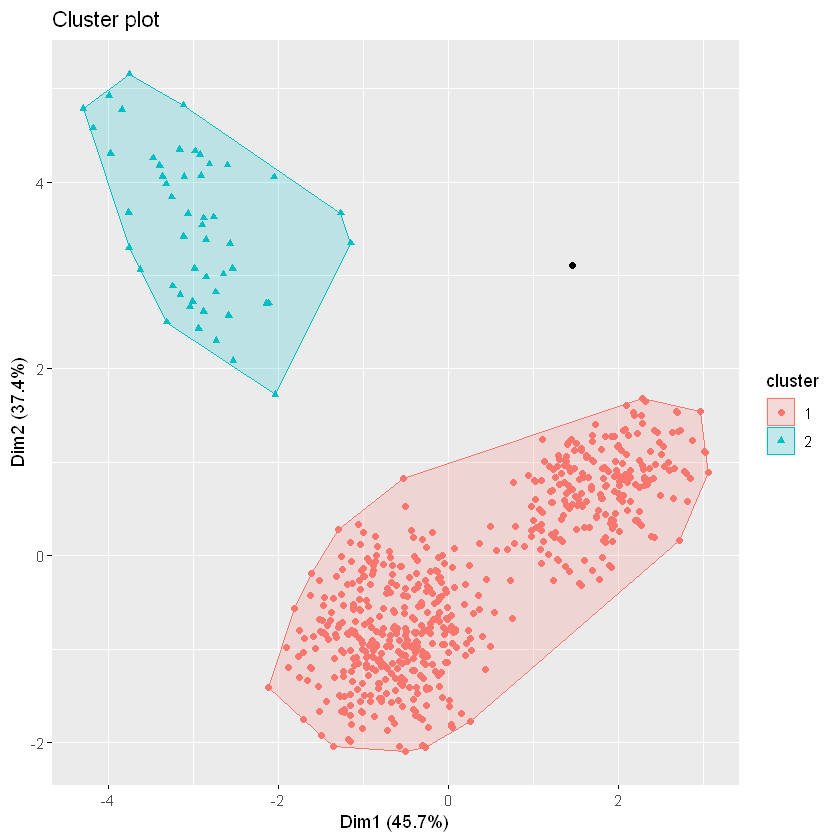


minpoint:  3   
eps:  1.7

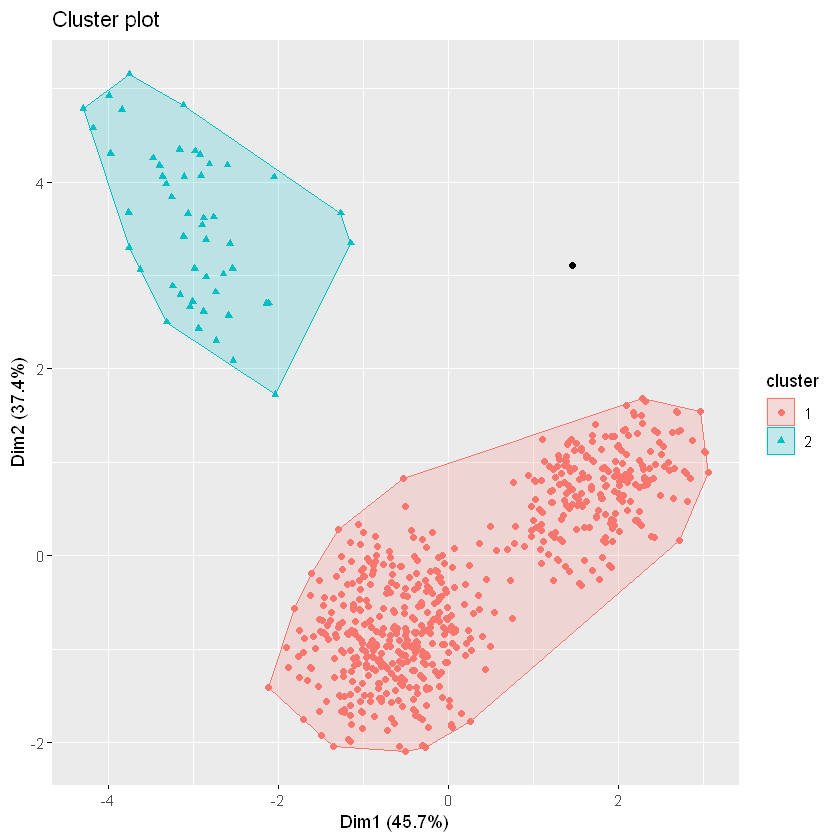


minpoint:  3   
eps:  1.8

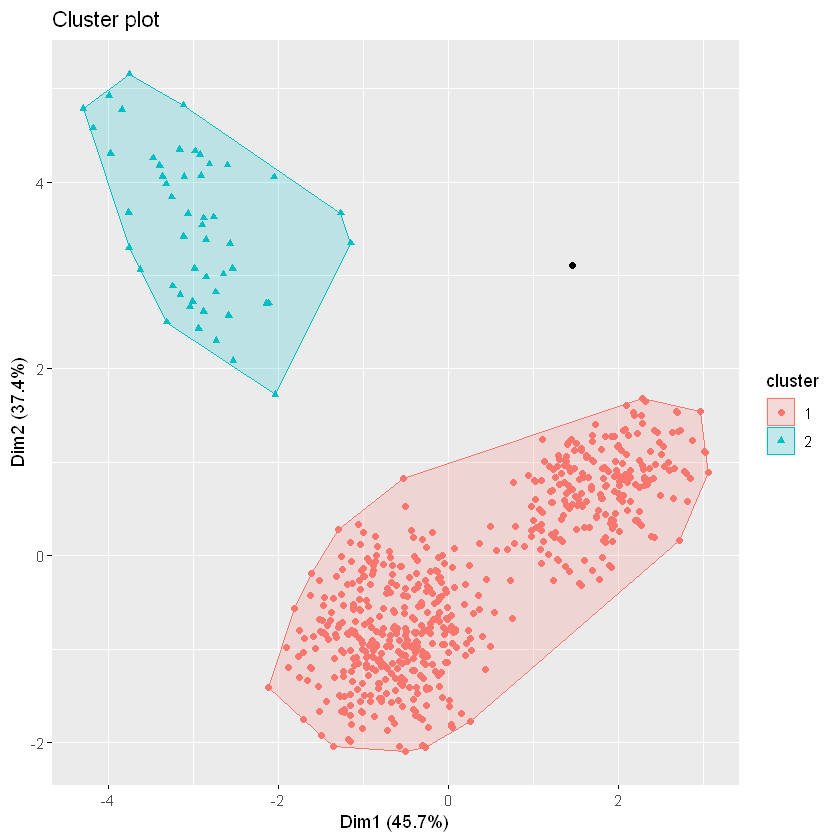


minpoint:  4   
eps:  0.8

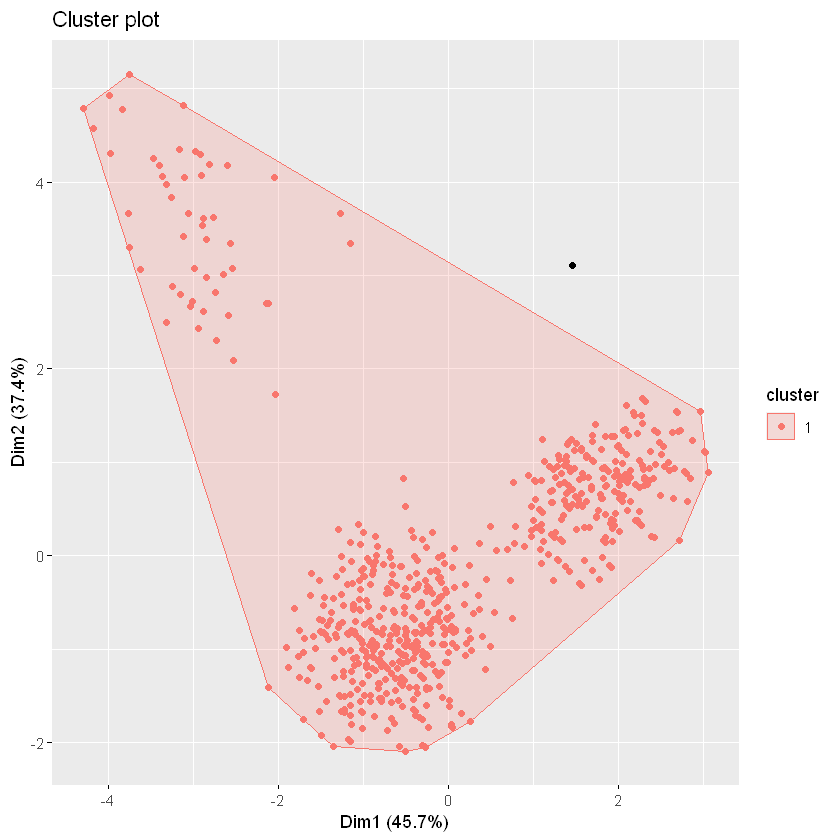


minpoint:  4   
eps:  0.9

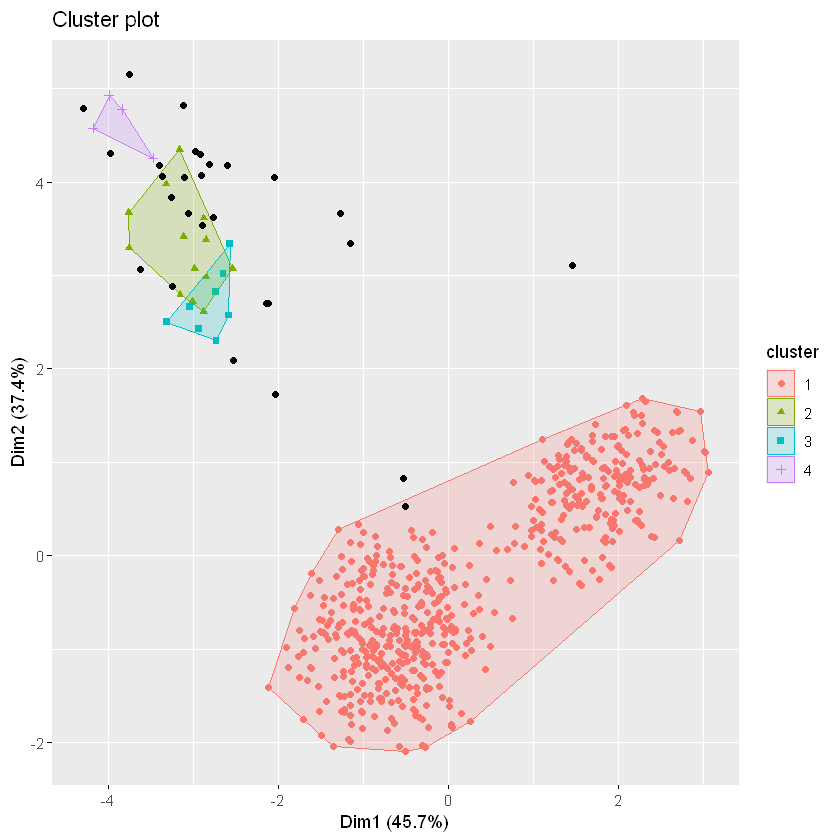


minpoint:  4   
eps:  1

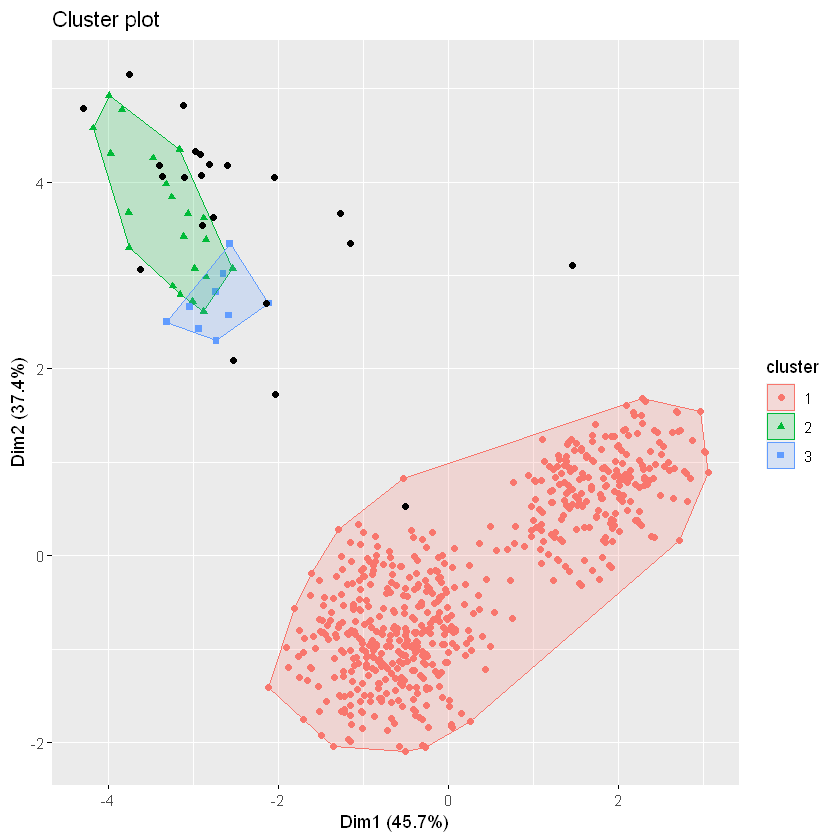


minpoint:  4   
eps:  1.1

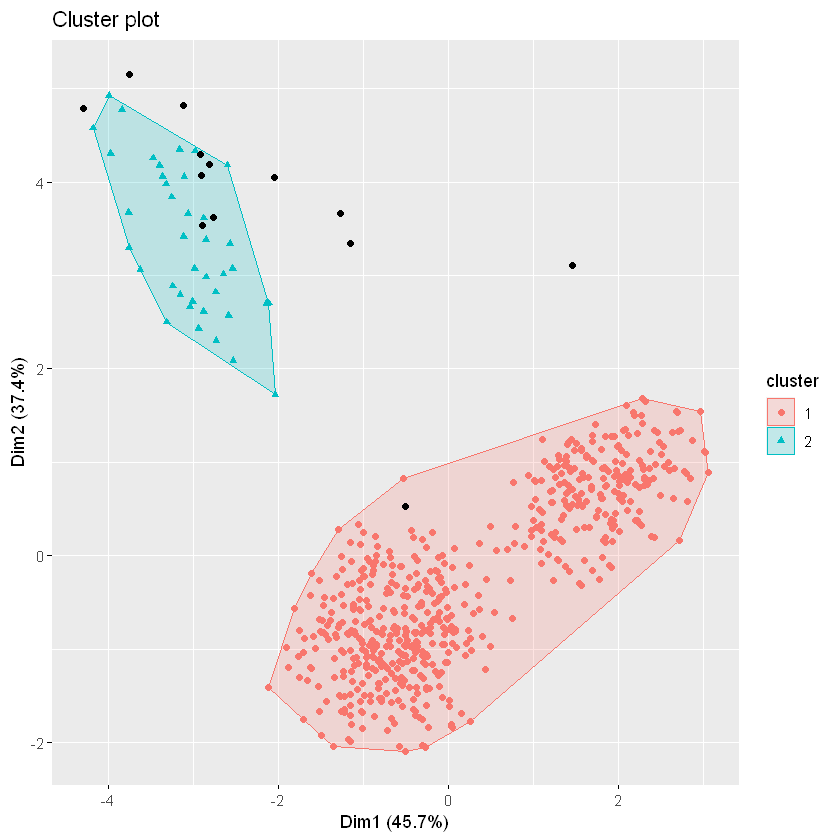


minpoint:  4   
eps:  1.2

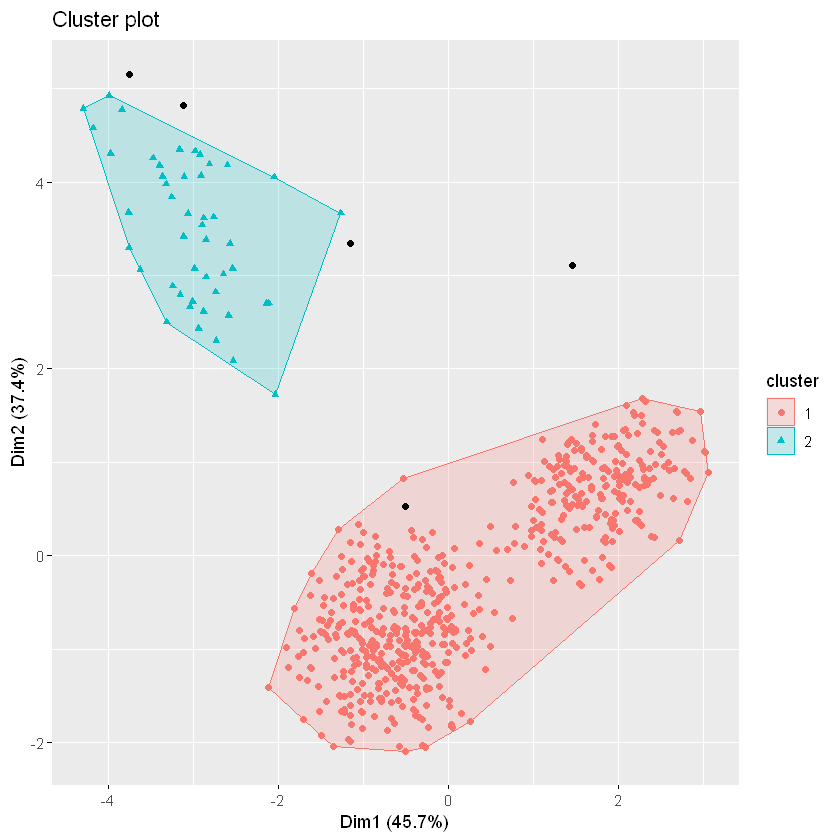


minpoint:  4   
eps:  1.3

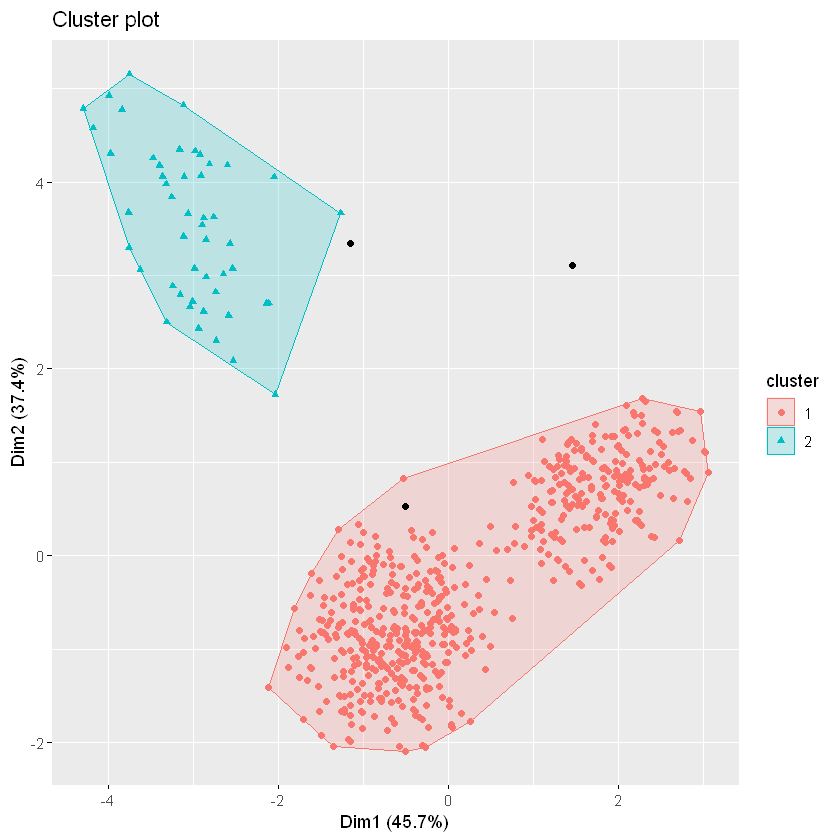


minpoint:  4   
eps:  1.4

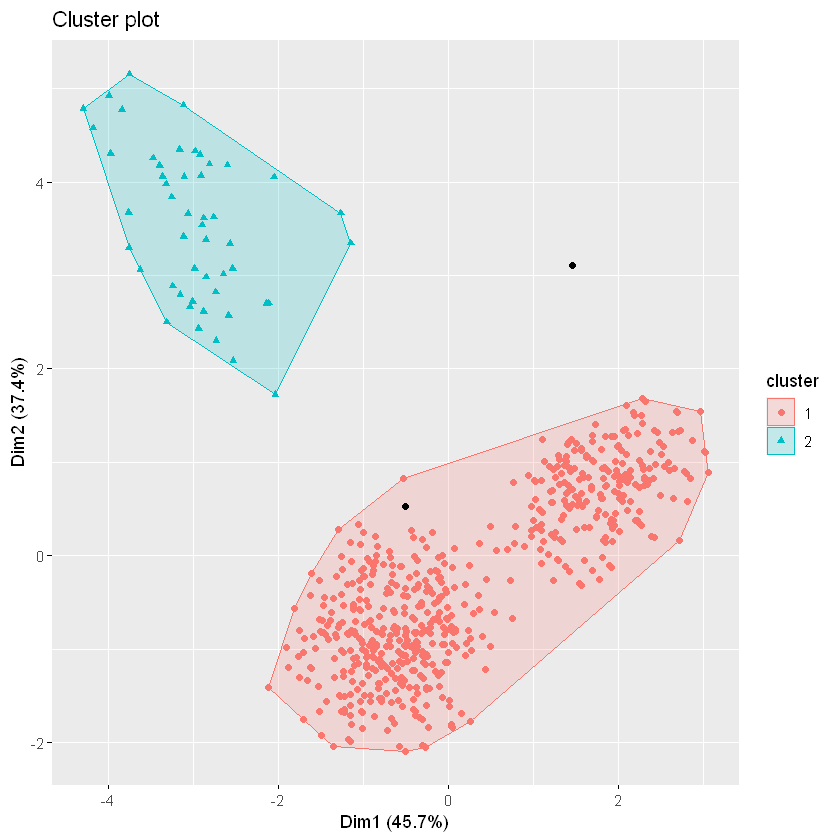


minpoint:  4   
eps:  1.5

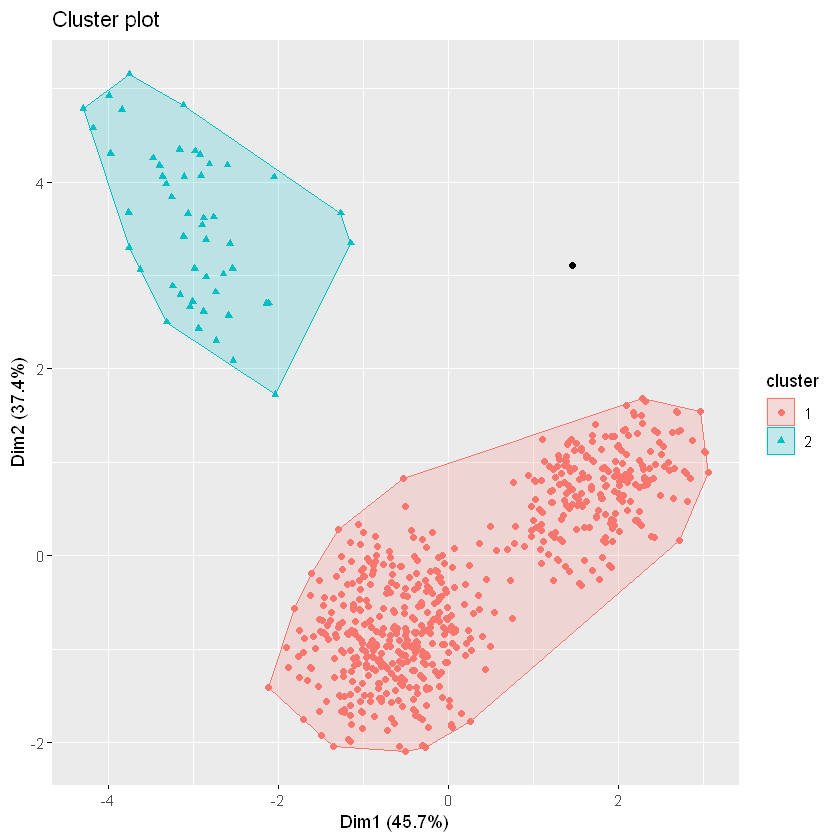


minpoint:  4   
eps:  1.6

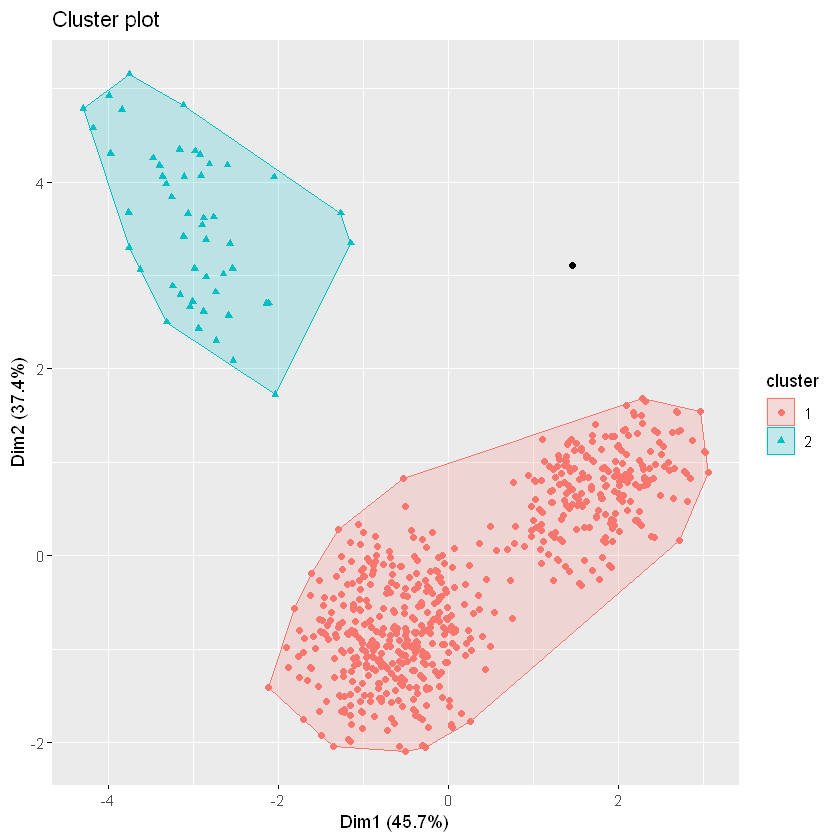


minpoint:  4   
eps:  1.7

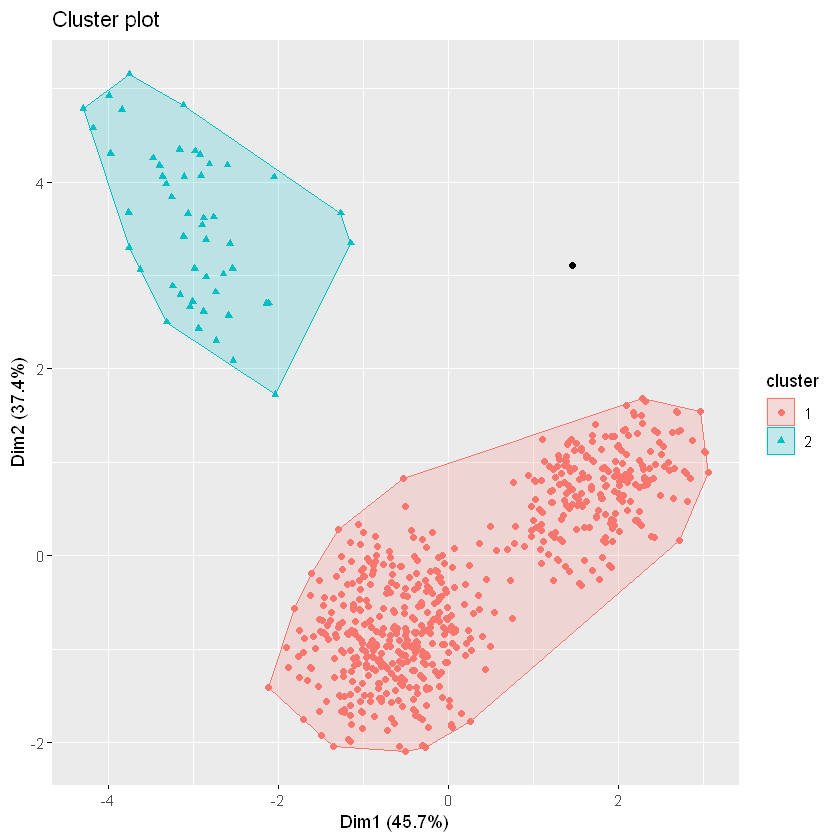


minpoint:  4   
eps:  1.8

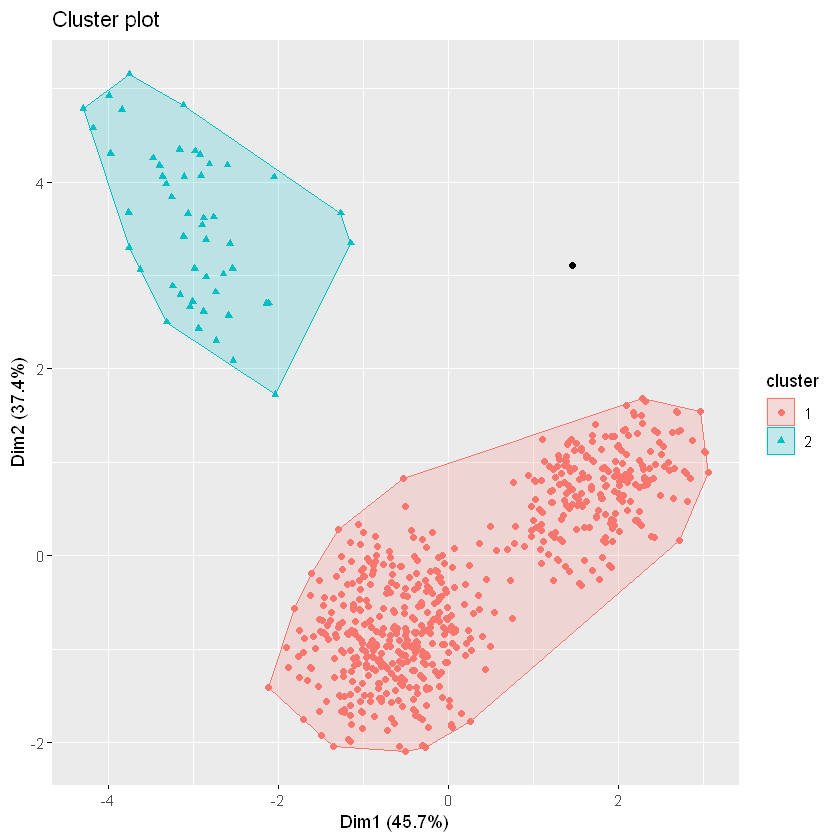


minpoint:  5   
eps:  0.8

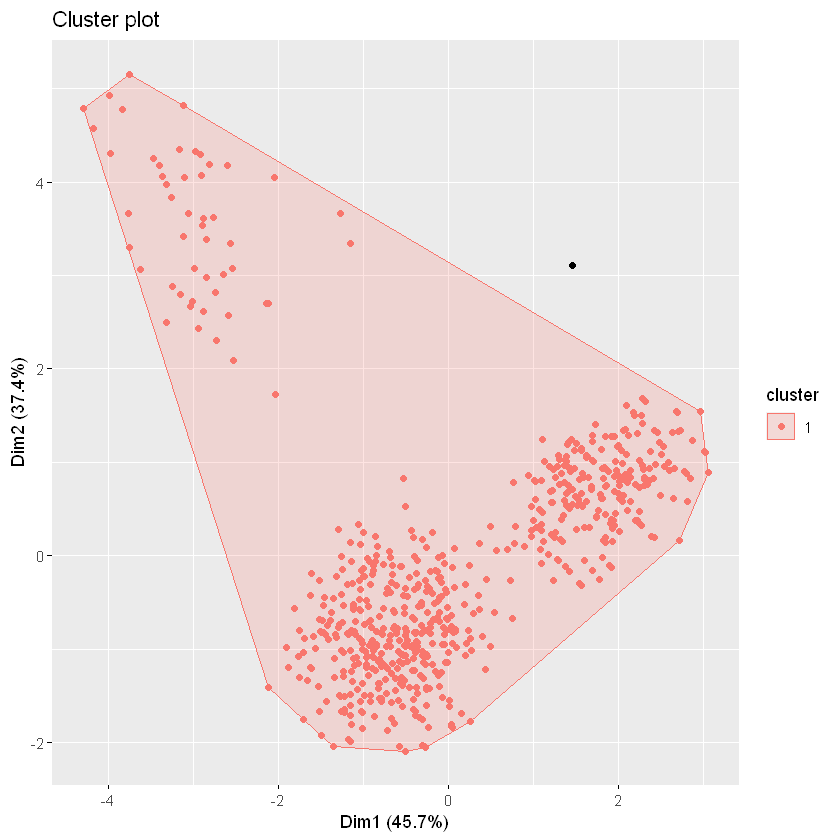


minpoint:  5   
eps:  0.9

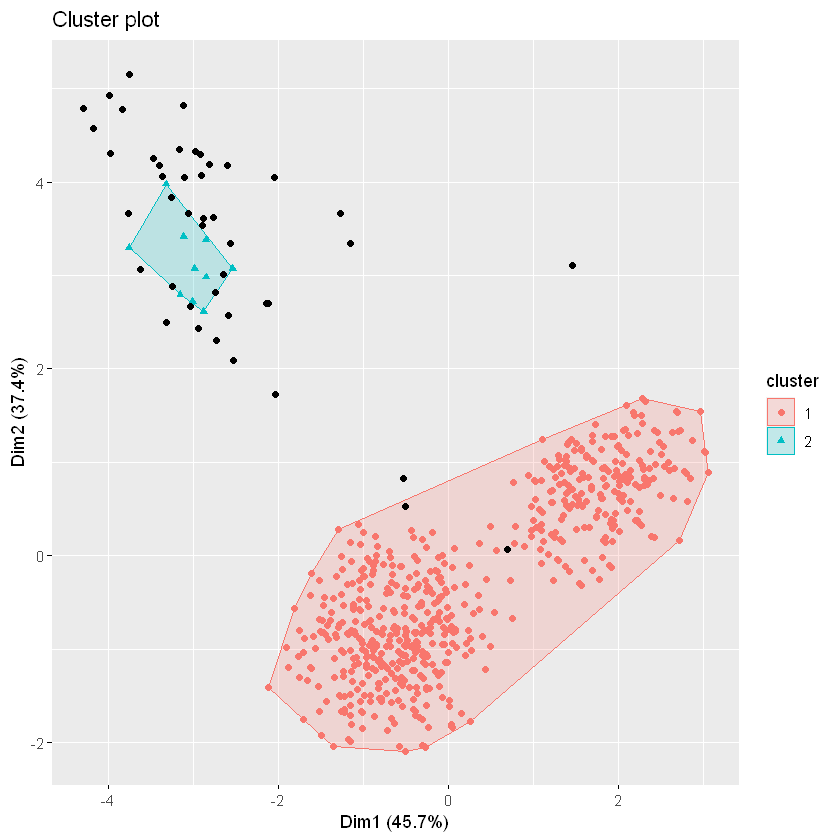


minpoint:  5   
eps:  1

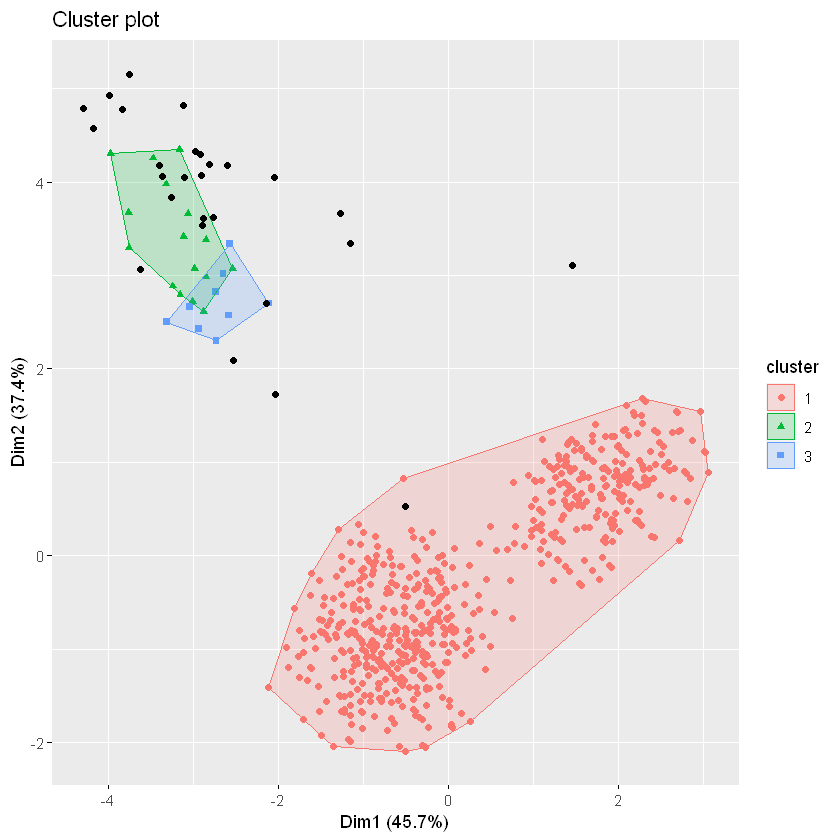


minpoint:  5   
eps:  1.1

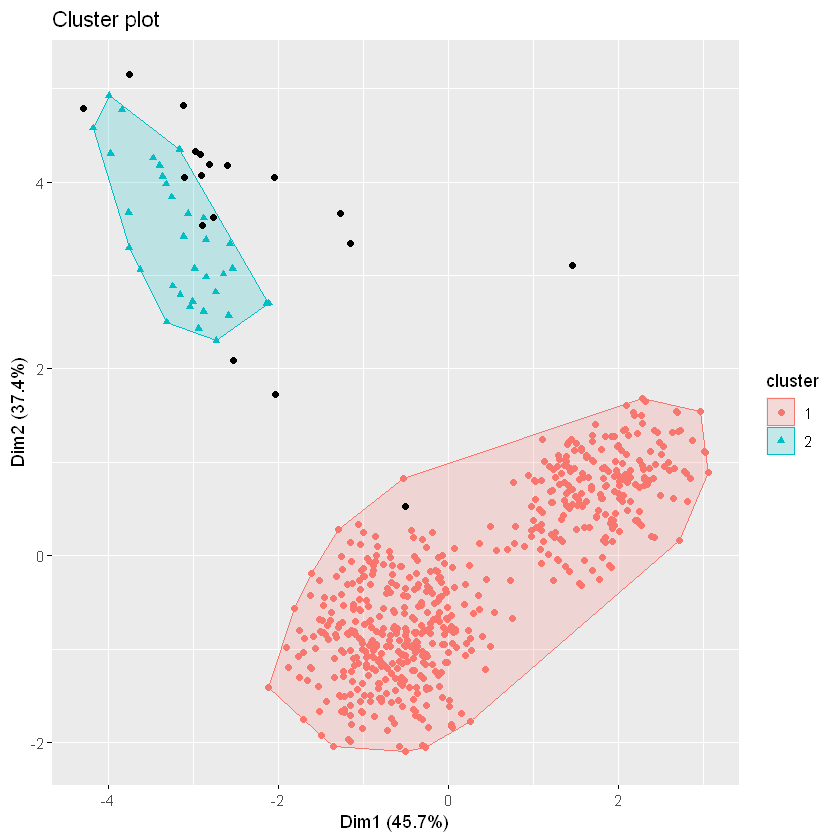


minpoint:  5   
eps:  1.2

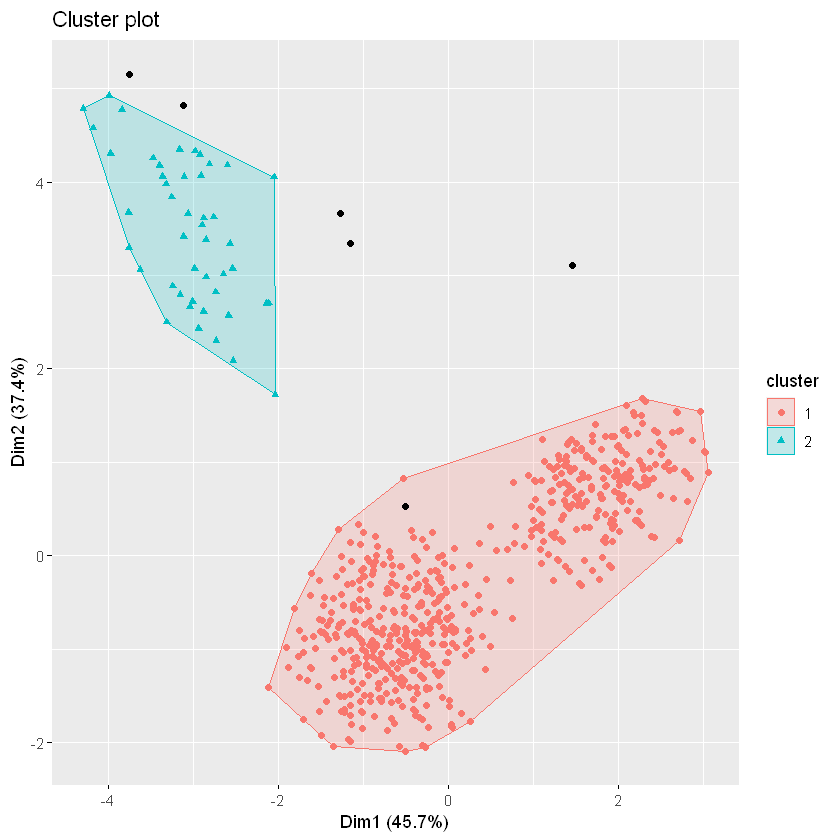


minpoint:  5   
eps:  1.3

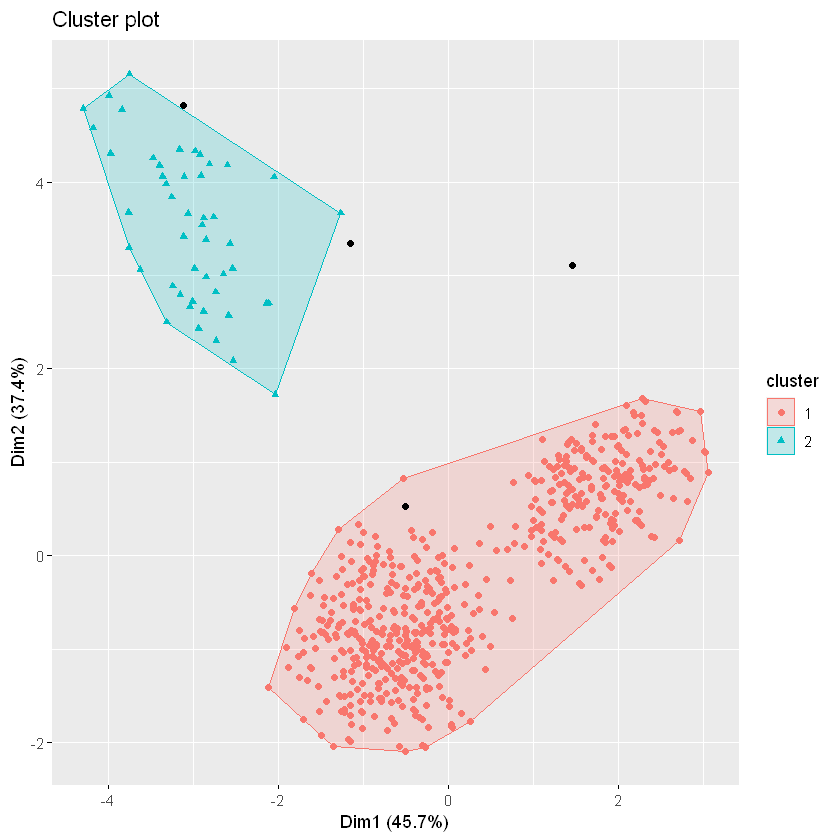


minpoint:  5   
eps:  1.4

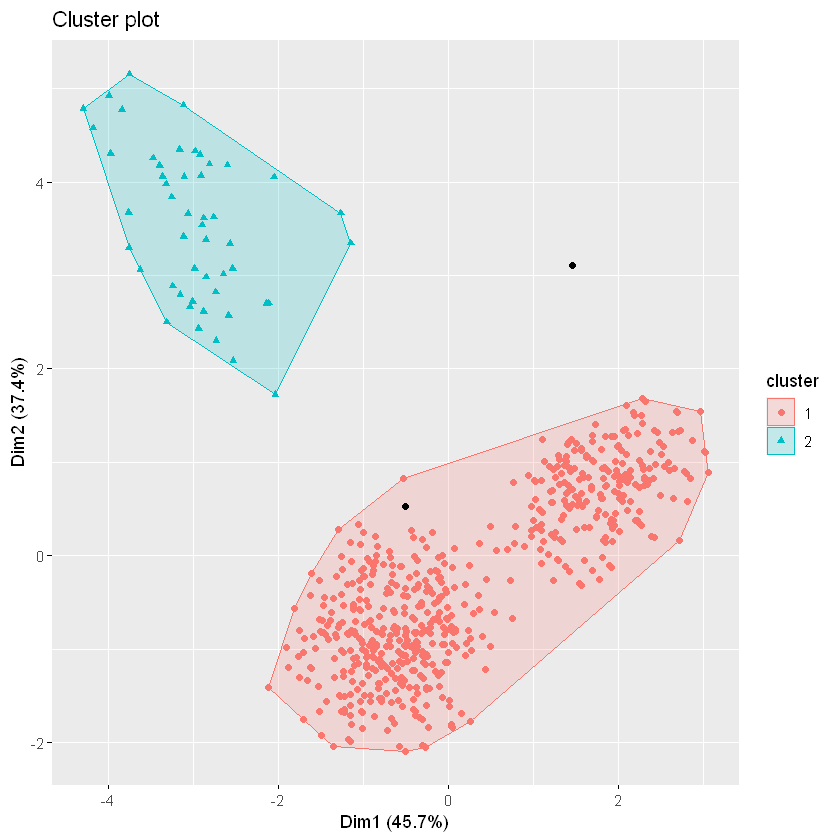


minpoint:  5   
eps:  1.5

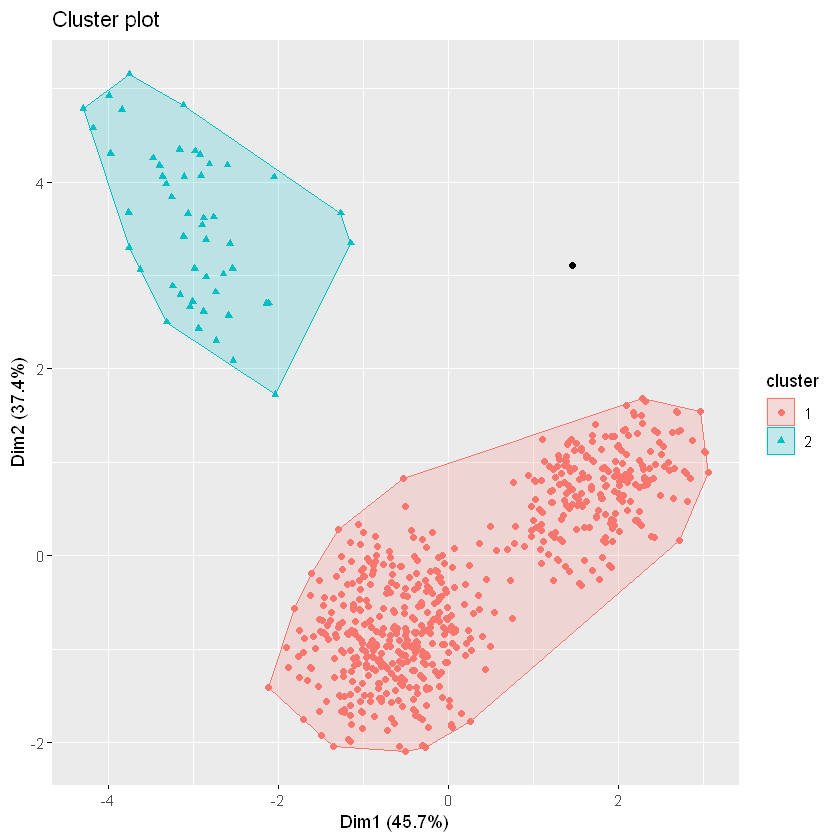


minpoint:  5   
eps:  1.6

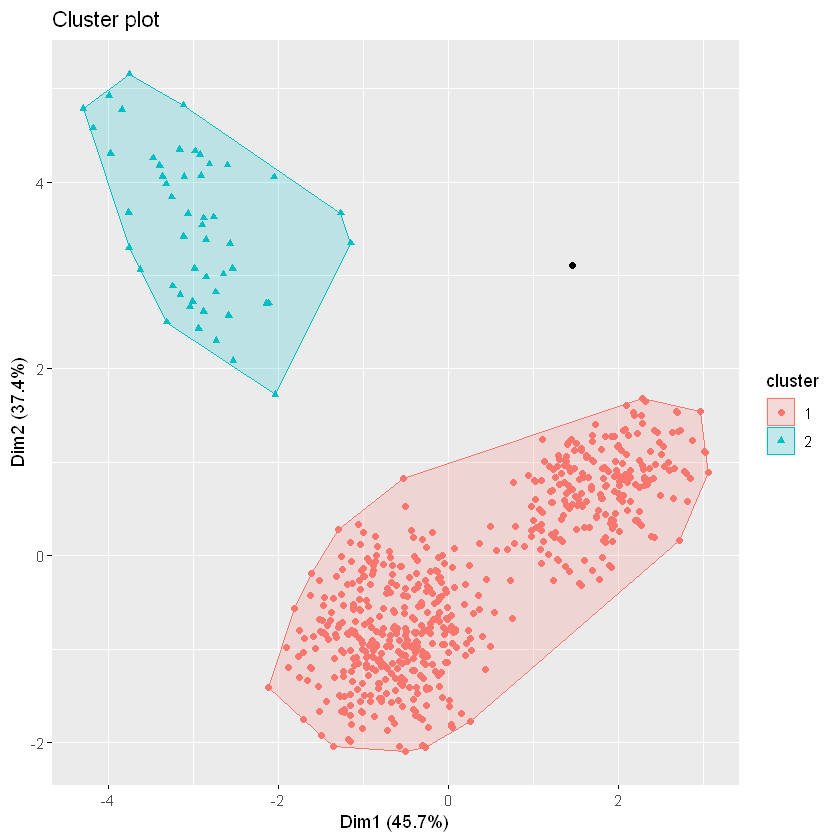


minpoint:  5   
eps:  1.7

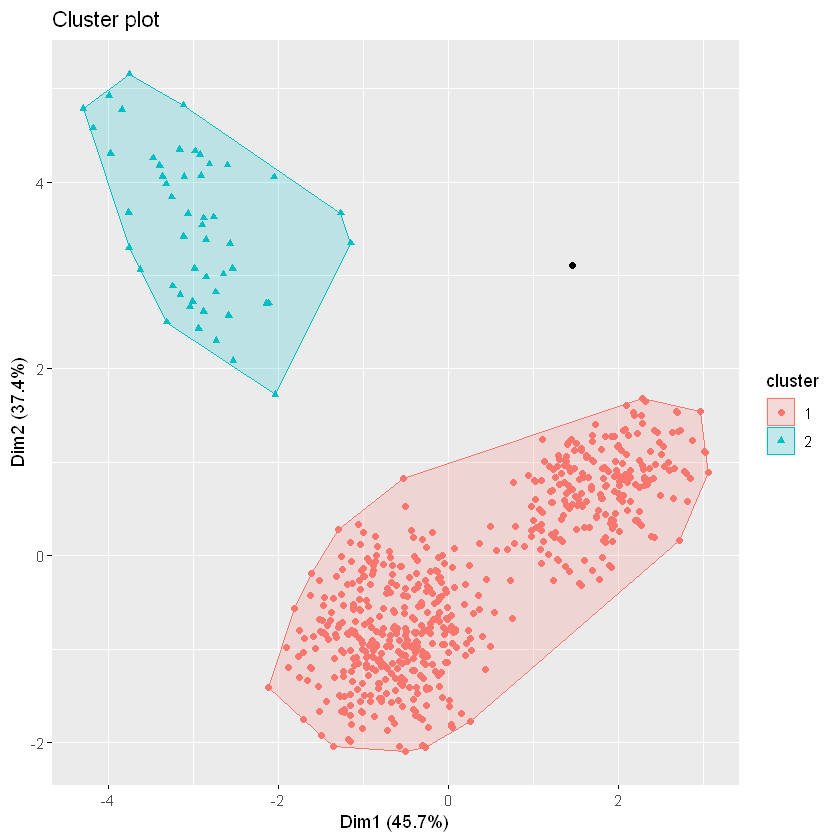


minpoint:  5   
eps:  1.8

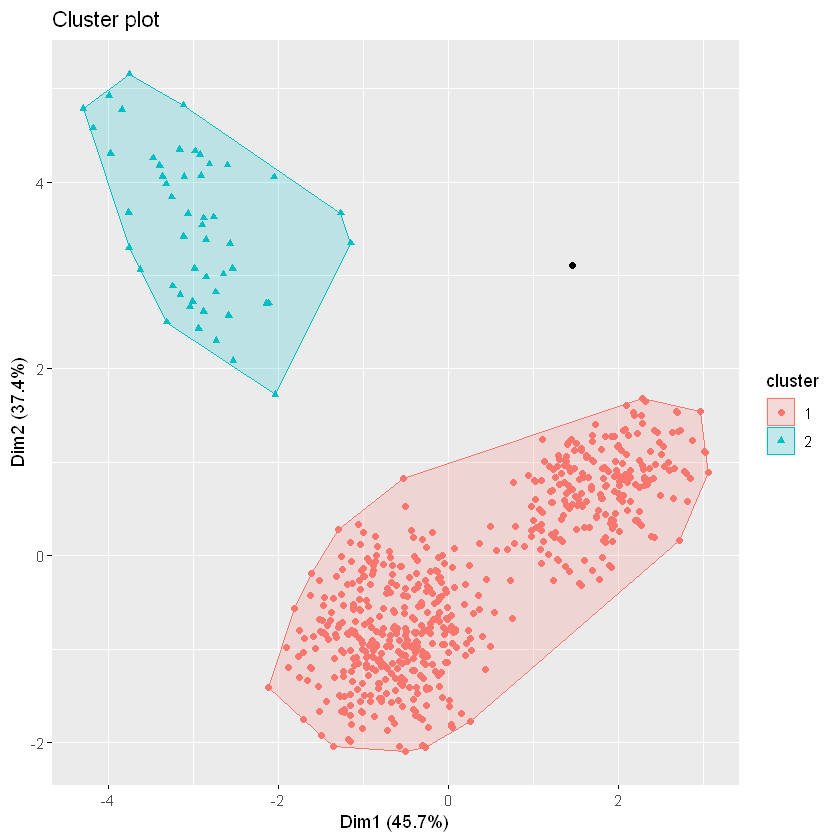


minpoint:  6   
eps:  0.8

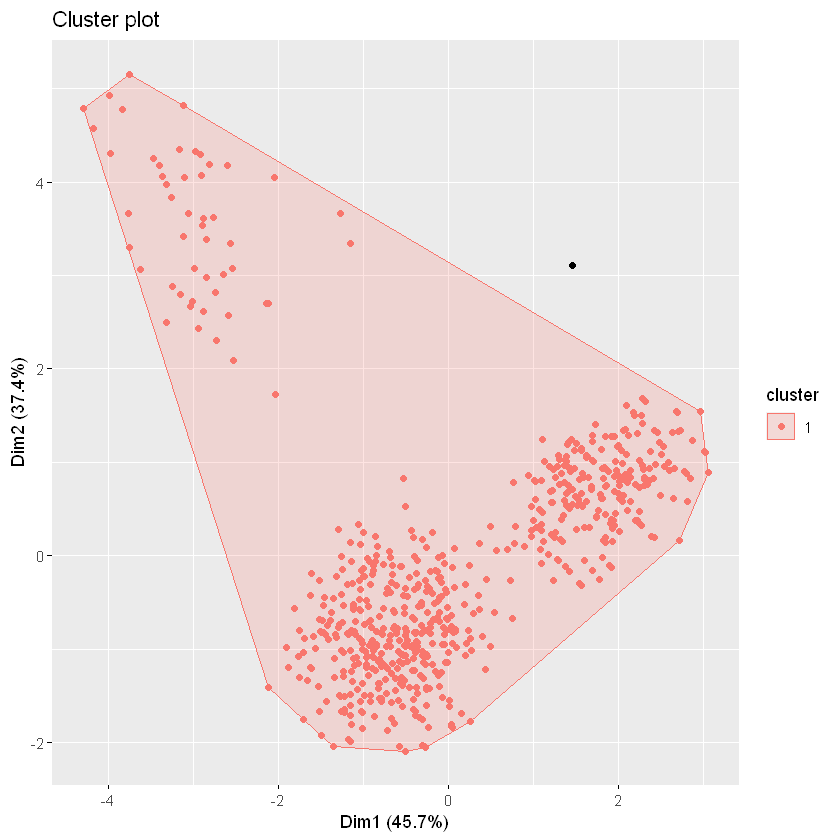


minpoint:  6   
eps:  0.9

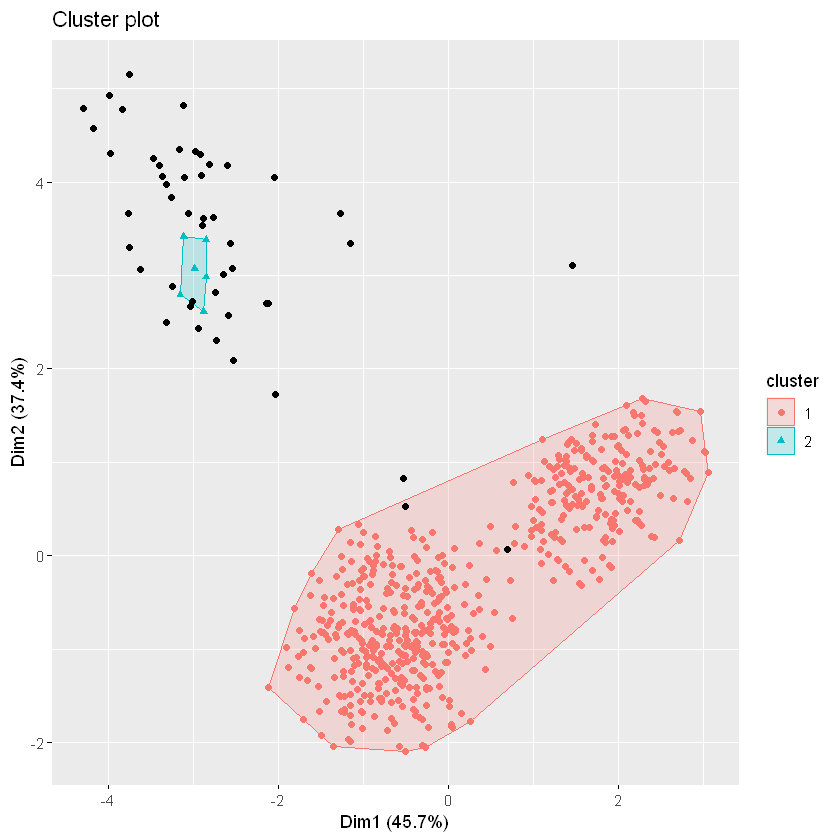


minpoint:  6   
eps:  1

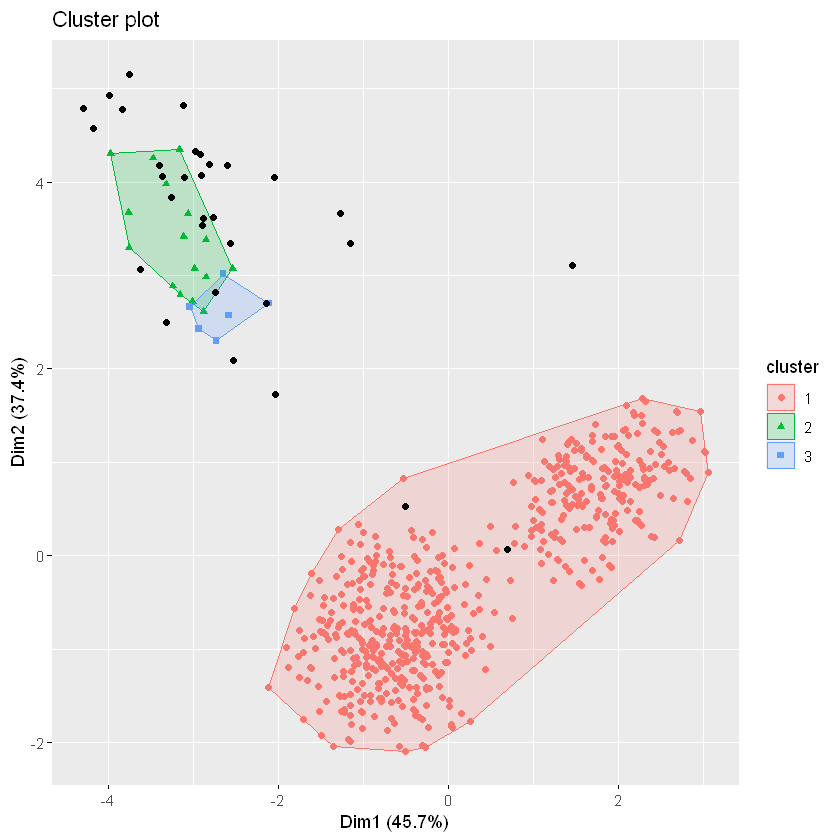


minpoint:  6   
eps:  1.1

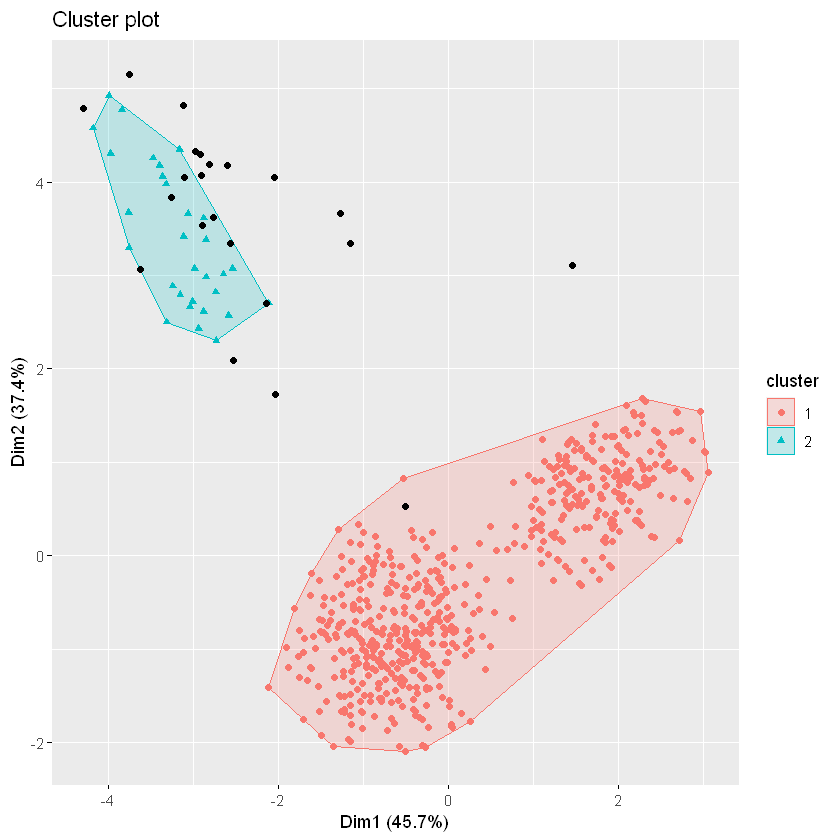


minpoint:  6   
eps:  1.2

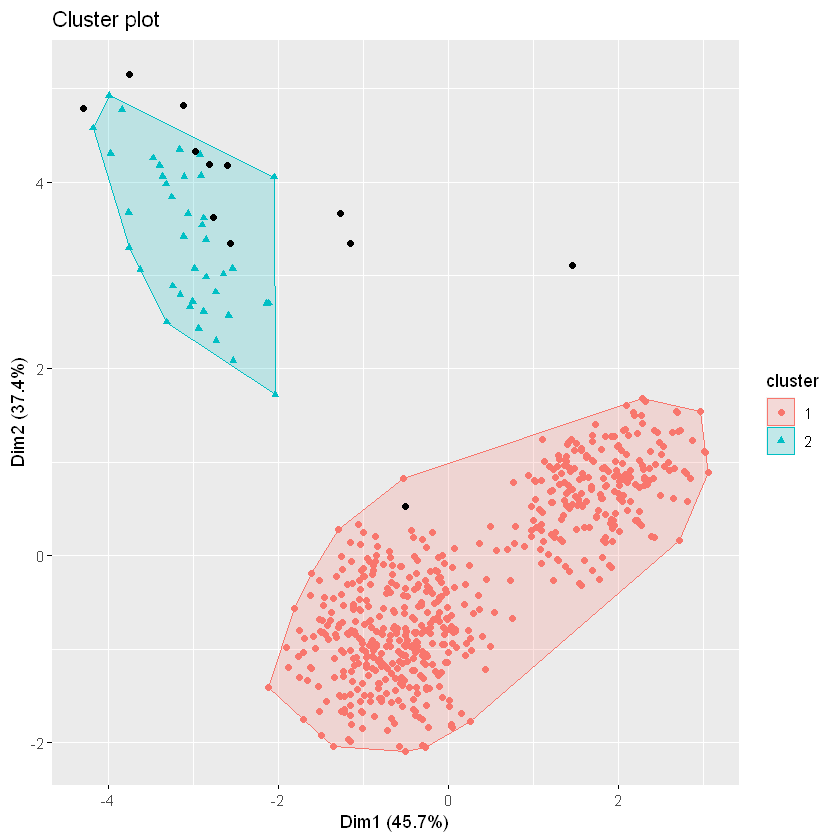


minpoint:  6   
eps:  1.3

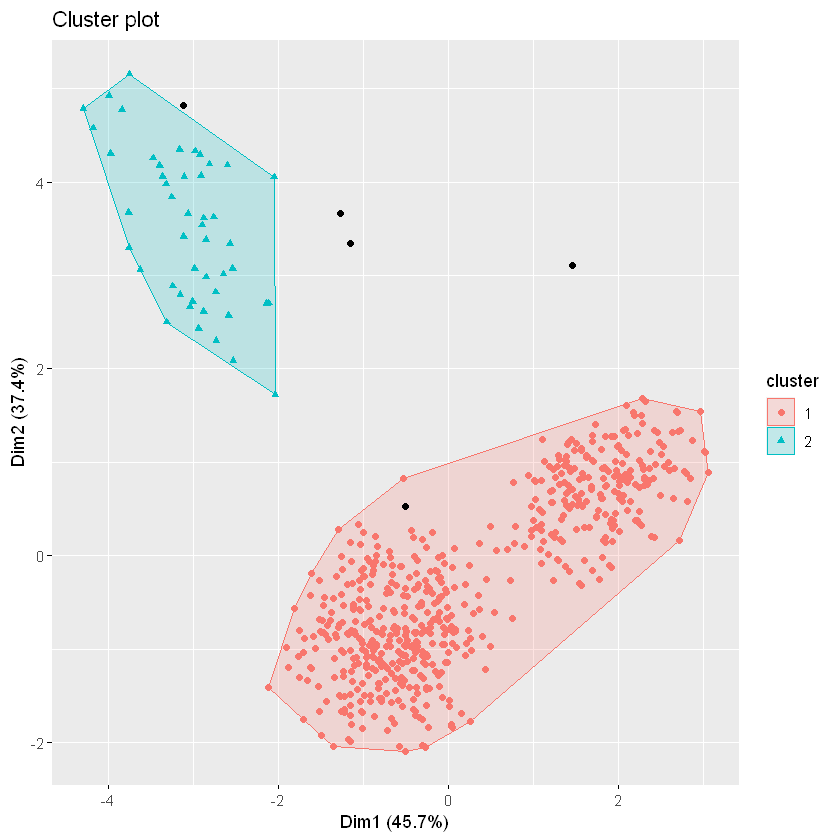


minpoint:  6   
eps:  1.4

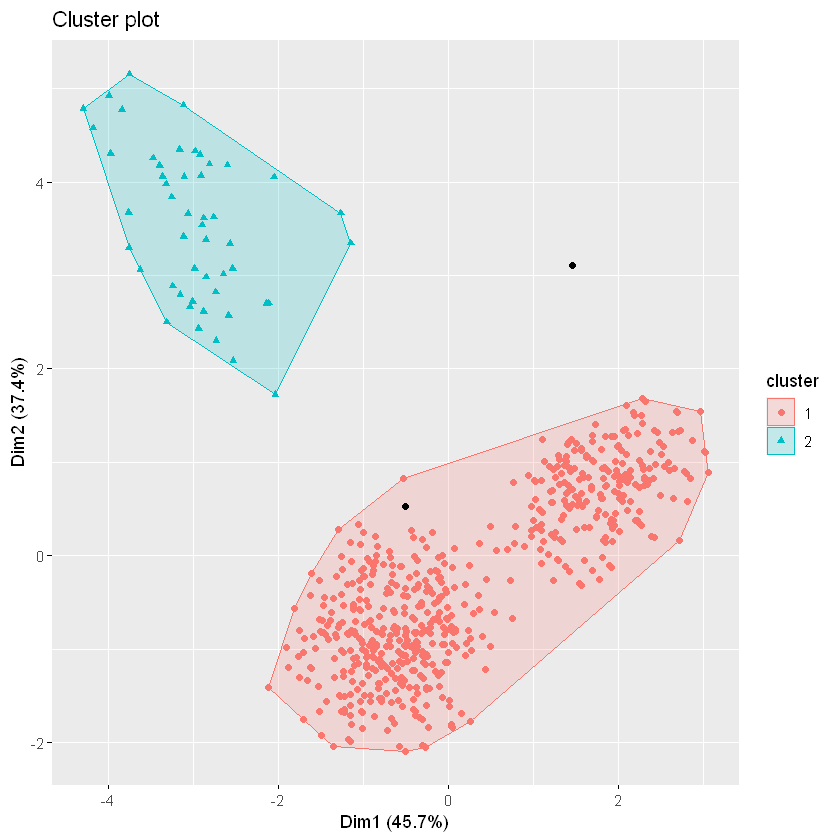


minpoint:  6   
eps:  1.5

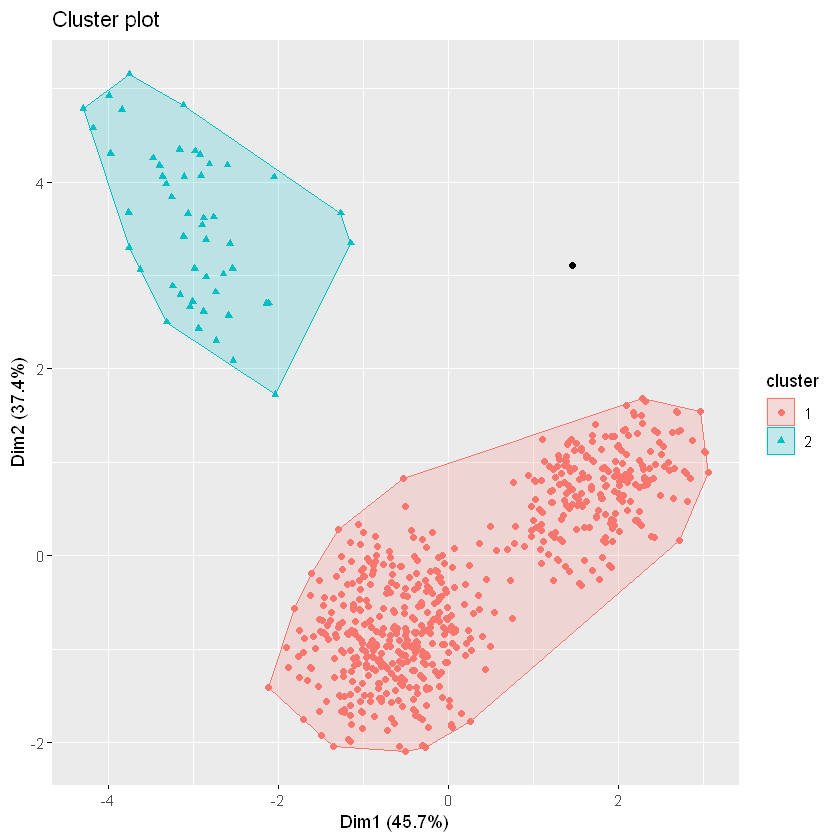


minpoint:  6   
eps:  1.6

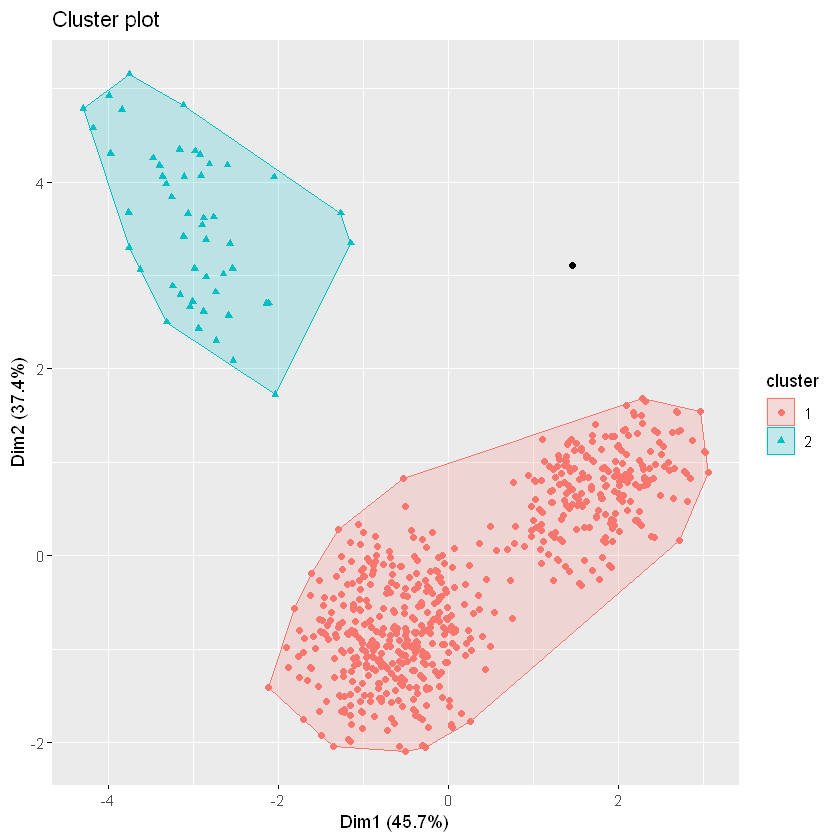


minpoint:  6   
eps:  1.7

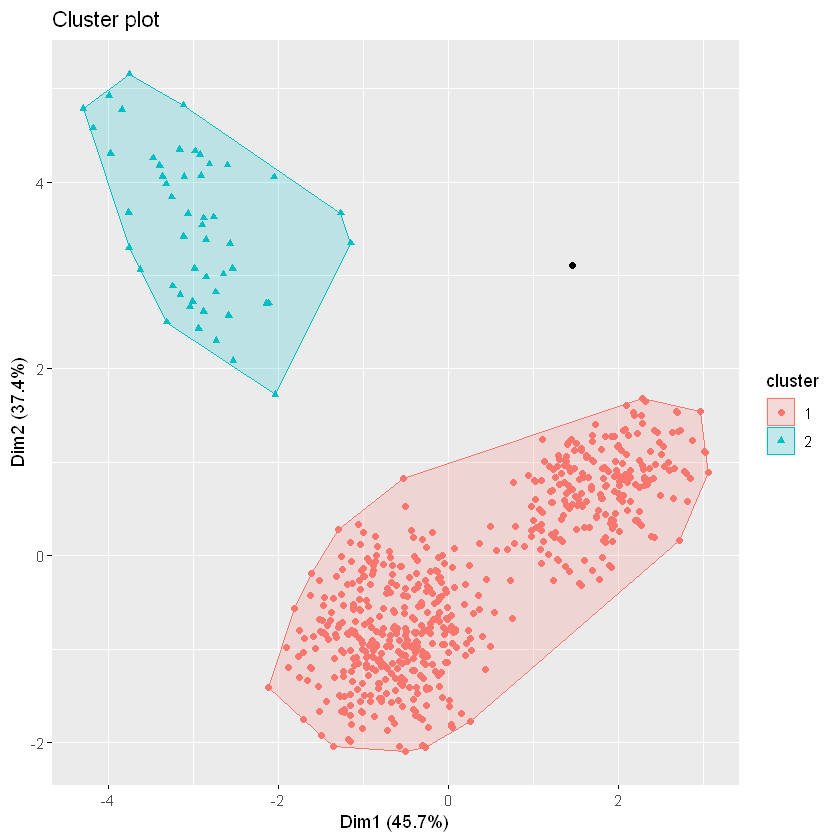


minpoint:  6   
eps:  1.8

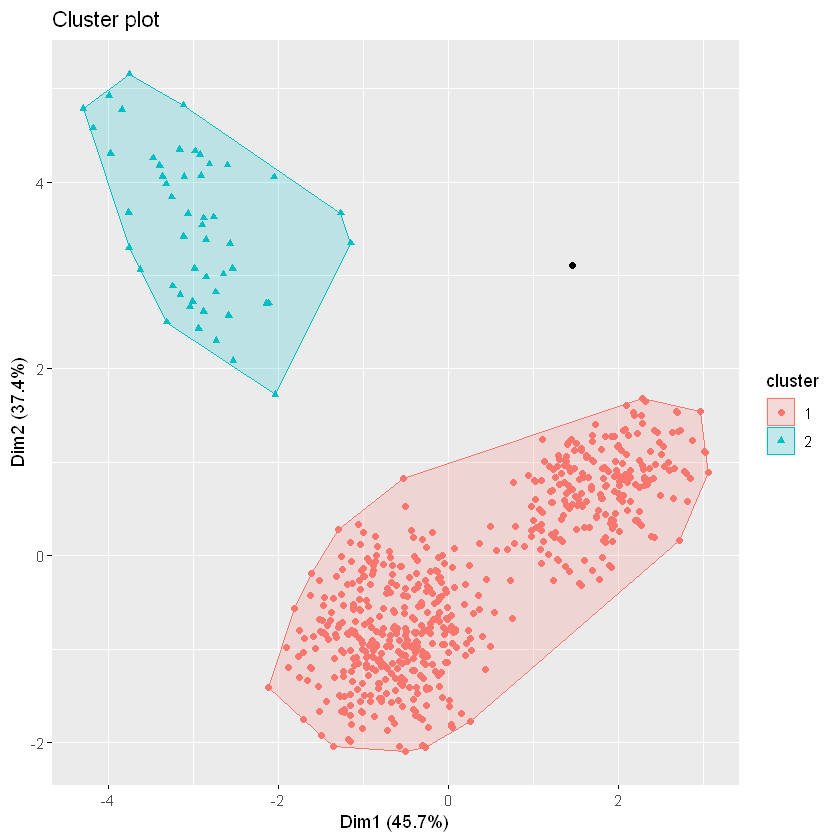

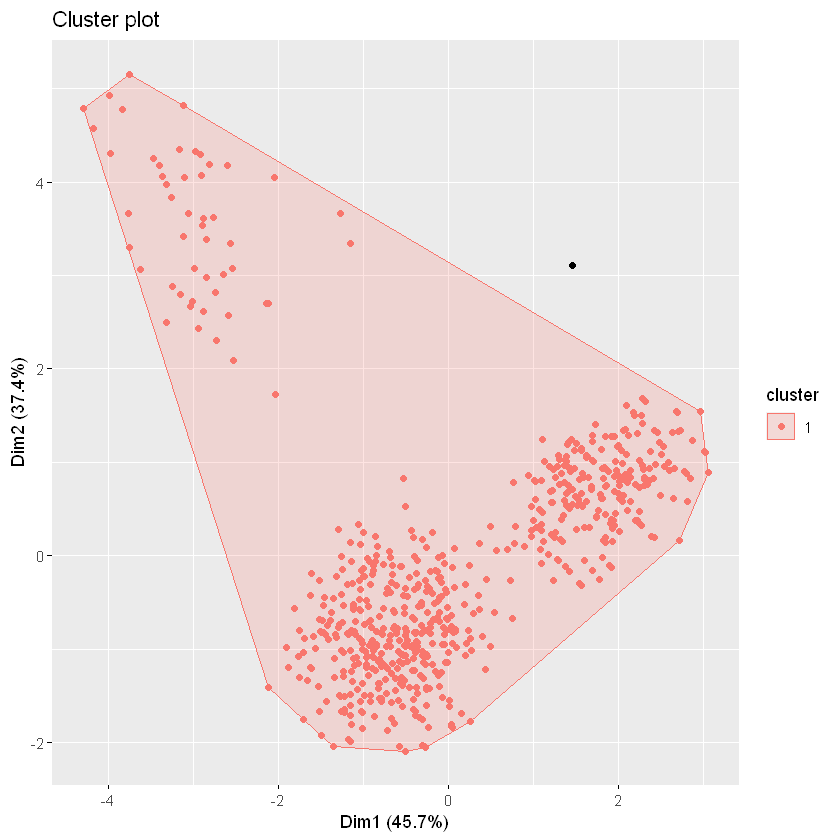

In [27]:
# 비록 위 문제에서는 k=4로 했지만, 원래 optimal k=2 임으로 아래 DBSCAN은 k=2로 하겠습니다.
eps_<- seq(from=0.8, to=1.8, by=0.1)
for( i in c(2:6)){
    for(j in eps_ ){
        DBSCAN_multishapes <- dbscan(df_s, eps = j, minPts = i)
        cat("\nminpoint: ", i ,"  \neps: " ,j)
        f<-fviz_cluster(DBSCAN_multishapes, df_s, ellipse = TRUE, geom = "point",
                     show.clust.cent = FALSE)
        #cat("\nminpoint: ", i ,"  \neps: " ,j)
        print(f)
    }
}

위 코드로 다양한 k=2인 결과값들이 나왔지만, 지속적으로 k=2가 나오는 eps의 첫번째 값인 1.3과 그때 minpoint= 2로 정하겠습니다.

# A10 

In [30]:
DBSCAN <- dbscan(df_s, eps = 1.3, minPts = 2)
cluster_id <- DBSCAN$cluster
cluster_id <-as.factor(cluster_id) # 여기 level에서 1,2 가 아닌 값은 다 noise로 판별
dbscan_df<-data.frame(df_s)
dbscan_df<-cbind(dbscan_df,cluster_id)
table(dbscan_df$cluster_id)


  0   1   2 
  2 608  50 

즉 위 코드의 결과로, 군집 1은 608개, 군집 2는 50개, noise는 2개입니다.


# A11

위 데이터에서 가장 적합한 군집화 알고리즘은 complete hierarchical clustering인 것 같습니다. 우선 위 데이터를 군집화 하는 목적은 다양한 소비자군을 구분하기 위해서 이기 때문입니다. 그래서 지속적으로 k=2가 최적이라고 나온 k-means clustering은 최적의 방법이 아닙니다. 또한 DBSCAN 방법 또한 minpoint와 eps에 따라서 다양한 클러스터수가 나왔지만 대부분 군집의 갯수가 1 또는 2가 나왔습니다. 그래서 다양한 군집으로 분류해야하는 목적에 부합하지 않습니다.
그럼 계층적 군집화중 complete method와 single method를 비교해보면 complete 방법이 더 군집을 명확하게 분류하는 것을 덴드로그램을 통해 알 수 있습니다. 그래서 계층적 군집화(complete) 알고리즘이 제가 생각하기에는 이 데이터에 가장 적합한 알고리즘 입니다.